<a href="https://colab.research.google.com/github/puneetasenyurrita-star/120-Final/blob/main/Copy_of_120_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project

**Course:** MATH 120

**Format:** Individual project    

 **Deliverables**
 1. GitHub repository + write-up + filly reproducible notebook




### In Cell below, is GitHub code. which sets up the environment.

In [3]:
import os
import sys

# Check if running in Google Colab
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab")

    # Clone repository if in Colab
    if not os.path.exists('/content/drive/MyDrive/120-Final/'):
        !git clone https://github.com/puneetasenyurrita-star/120-Final.git

    # Change to project directory
    # The repository is cloned into /content/120-Final by default
    os.chdir('/content/120-Final')

except ImportError:
    IN_COLAB = False
    print("Running locally")

# Add src directory to Python path
if 'src' not in sys.path:
    sys.path.append('src')

print(f"Current working directory: {os.getcwd()}")

Running in Google Colab
Cloning into '120-Final'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 35 (delta 9), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 332.17 KiB | 4.31 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Current working directory: /content/120-Final


## Data Loading and Cleaning + Method 1

### In the cell below, the dataset is loaded through the mount drive method which contains about 400 songs including remixes and unreleased songs from different albums of legendary music artist Rihanna.


## Question 1 to answer: How does sentiment change across Rihanna's different music albumns?

In [4]:
import pandas as pd

# Load the CSV file directly into a pandas data frame and read the data
df_chat = pd.read_csv('/content/120-Final/data_raw/Rihanna.csv')
df_chat.head()

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Rihanna,Work,ANTI,2016.0,2016-01-27,rihanna work work work work work work he said ...
1,1,Rihanna,Love on the Brain,ANTI,2016.0,2016-01-28,and you got me like oh what you want from me w...
2,2,Rihanna,Needed Me,ANTI,2016.0,2016-01-28,yg mustard on the beat ho i was good on my o...
3,3,Rihanna,Stay,Unapologetic,2013.0,2013-01-07,rihanna all along it was a fever a cold sweat ...
4,4,Rihanna,Kiss It Better,ANTI,2016.0,2016-01-28,kiss it kiss it better baby kiss it kiss it be...


### The cell below shows a test of just one song being uploaded with it's full associated lyrics.

In [5]:
import pandas as pd

csv = '/content/120-Final/data_raw/Rihanna.csv'
df_chat = pd.read_csv(csv)

# Display the full lyrics of the first song in the df_chat data frame by index-based
first_song_lyrics = df_chat.iloc[0]['Lyric']

print(first_song_lyrics)

rihanna work work work work work work he said me haffi work work work work work work he see me do mi dirt dirt dirt dirt dirt dirt so me put in work work work work work work when you ah guh learn learn learn learn learn meh nuh cyar if him hurt hurt hurt hurt hurting   rihanna dry me a desert him nuh time to have you lurking him ah go act like he nuh like it you know i dealt with you the nicest nuh body touch me you nuh righteous nuh badda text me in a crisis i believed all of your dreams adoration you took my heart and my keys and my patience you took my heart on my sleeve for decoration you mistaken my love i brought for you for foundation all that i wanted from you was to give me something that i never had something that you've never seen something that you've never been mmmmm but i wake up and act like nothing's wrong just get ready fi   rihanna work work work work work work he said me haffi work work work work work work he see me do mi dirt dirt dirt dirt dirt dirt so me put in wo

## Sentiment Analyzer for sentiment scores

In [6]:
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

class LyricSentimentAnalyzer:
    """
    A class to perform sentiment analysis on song lyrics using NLTK's VADER.
    """
    def __init__(self):
        """
        Initializes the SentimentIntensityAnalyzer and downloads the vader_lexicon
        if not already present.
        """
        try:
            nltk.data.find('sentiment/vader_lexicon.zip')
        except LookupError:
            nltk.download('vader_lexicon')
        self.sid = SentimentIntensityAnalyzer()

    def get_sentiment_scores(self, lyric):
        """
        Calculates sentiment scores (negative, neutral, positive, and compound)
        for a given lyric using NLTK's VADER sentiment intensity analyzer.
        """
        return pd.Series(self.sid.polarity_scores(str(lyric)))

    def analyze_dataframe(self, df, lyric_column='Lyric'):
        """
        Applies sentiment analysis to the specified lyric column of a DataFrame
        and adds new columns for negative, neutral, positive, and compound scores.
        """
        # Ensure df_chat is a copy to avoid SettingWithCopyWarning
        df_copy = df.copy()
        df_copy[['neg', 'neu', 'pos', 'compound']] = df_copy[lyric_column].apply(self.get_sentiment_scores)
        return df_copy

# Instantiate the sentiment analyzer
sentiment_analyzer = LyricSentimentAnalyzer()

# Apply sentiment analysis to the 'Lyric' column of df_chat using the defined class method
df_chat = sentiment_analyzer.analyze_dataframe(df_chat, lyric_column='Lyric')

# Display the DataFrame with new sentiment scores
display(df_chat.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric,neg,neu,pos,compound
0,0,Rihanna,Work,ANTI,2016.0,2016-01-27,rihanna work work work work work work he said ...,0.203,0.710,0.088,-0.9974
1,1,Rihanna,Love on the Brain,ANTI,2016.0,2016-01-28,and you got me like oh what you want from me w...,0.166,0.550,0.284,0.9959
2,2,Rihanna,Needed Me,ANTI,2016.0,2016-01-28,yg mustard on the beat ho i was good on my o...,0.232,0.718,0.050,-0.9969
3,3,Rihanna,Stay,Unapologetic,2013.0,2013-01-07,rihanna all along it was a fever a cold sweat ...,0.036,0.911,0.053,0.3189
4,4,Rihanna,Kiss It Better,ANTI,2016.0,2016-01-28,kiss it kiss it better baby kiss it kiss it be...,0.093,0.674,0.234,0.9982


## Songs filtered out by most recent album to descending order.

In [7]:
unique_albums = df_chat[~df_chat['Album'].isnull()]['Album'].unique()

# for loop iterates each album and every song of the album to display in most recent to least
for album in unique_albums:
    print(f"\n--- Album: {album} ---")
    album_songs = df_chat[df_chat['Album'] == album]

    for index, row in album_songs.iterrows():
        song_title = row['Title']
        song_lyrics = row['Lyric']
        print(f"\nTitle: {song_title}")
        print(f"Lyrics:\n{song_lyrics}")


--- Album: ANTI ---

Title: Work
Lyrics:
rihanna work work work work work work he said me haffi work work work work work work he see me do mi dirt dirt dirt dirt dirt dirt so me put in work work work work work work when you ah guh learn learn learn learn learn meh nuh cyar if him hurt hurt hurt hurt hurting   rihanna dry me a desert him nuh time to have you lurking him ah go act like he nuh like it you know i dealt with you the nicest nuh body touch me you nuh righteous nuh badda text me in a crisis i believed all of your dreams adoration you took my heart and my keys and my patience you took my heart on my sleeve for decoration you mistaken my love i brought for you for foundation all that i wanted from you was to give me something that i never had something that you've never seen something that you've never been mmmmm but i wake up and act like nothing's wrong just get ready fi   rihanna work work work work work work he said me haffi work work work work work work he see me do mi dir

## Now the average sentiment scores will include negative, neutral, positive, and compound for each album. The compound score catches the overall sentiment score by combining the positive, negative and neutral scores.

In [8]:
sentiment_columns = ['neg', 'neu', 'pos', 'compound'] # Define the columns that contain sentiment scores.
df_album_sentiment = df_chat.groupby('Album')[sentiment_columns].mean().reset_index()
display(df_album_sentiment.head())

,Album,neg,neu,pos,compound
0,A Girl Like Me,0.101375,0.750938,0.147625,0.388856
1,A Girl Like Me (German Deluxe Edition Bonus Disc),0.116333,0.717667,0.166000,0.985700
2,ANTI,0.107750,0.692063,0.200250,0.536375
3,California King Bed (Remixes),0.039556,0.913000,0.047556,0.283478
4,Consideration (Dance Remixes),0.074167,0.793333,0.132667,0.327917


In [9]:
display(df_album_sentiment)

,Album,neg,neu,pos,compound
0,A Girl Like Me,0.101375,0.750938,0.147625,0.388856
1,A Girl Like Me (German Deluxe Edition Bonus Disc),0.116333,0.717667,0.166000,0.985700
2,ANTI,0.107750,0.692063,0.200250,0.536375
3,California King Bed (Remixes),0.039556,0.913000,0.047556,0.283478
4,Consideration (Dance Remixes),0.074167,0.793333,0.132667,0.327917
5,Desperado (Dance Remixes),0.043250,0.732000,0.224750,0.990850
6,Diamonds (Remixes),0.004000,0.362875,0.633000,0.999775
7,Disturbia (Remixes),0.059400,0.888400,0.052600,-0.000520
8,Don’t Stop the Music (Remixes),0.009750,0.648500,0.342250,0.999588
9,Good Girl Gone Bad,0.092786,0.740500,0.166786,0.562907


## Data Frame below shows the previous data frame sorted from highest sentiment score to lowest of each album but now with the average sentiment scores.


In [10]:
# Sort the DataFrame by compound sentiment for better visualization
df_album_sentiment_sorted = df_album_sentiment.sort_values(by='compound', ascending=False)

display(df_album_sentiment_sorted.head())

,Album,neg,neu,pos,compound
27,Ponzi Scheme,0.03700,0.532000,0.43000,0.999900
6,Diamonds (Remixes),0.00400,0.362875,0.63300,0.999775
8,Don’t Stop the Music (Remixes),0.00975,0.648500,0.34225,0.999588
38,Stripped: Raw & Real,0.00000,0.487000,0.51300,0.999400
25,Now That’s What I Call Christmas! 4 [US],0.00000,0.712000,0.28800,0.998800


## Data Visualization

#### To visualize the average sentiment one way this can be done is in a bar chart.

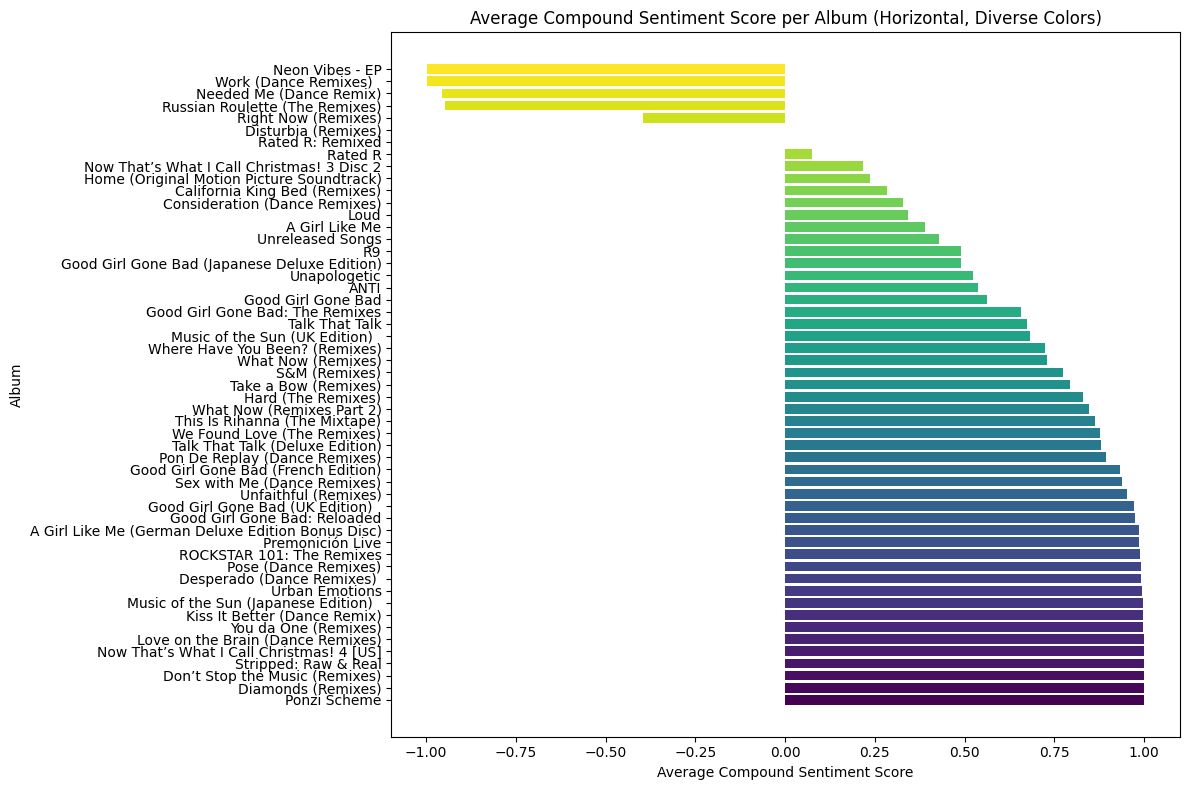

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the DataFrame by compound sentiment for better visualization
df_album_sentiment_sorted = df_album_sentiment.sort_values(by='compound', ascending=False)

# Generate a color map for each album
colors = plt.cm.viridis(np.linspace(0, 1, len(df_album_sentiment_sorted)))

plt.figure(figsize=(12, 8)) # Adjusted figure size for horizontal bars
plt.barh(df_album_sentiment_sorted['Album'], df_album_sentiment_sorted['compound'], color=colors)
plt.ylabel('Album') # Swapped labels
plt.xlabel('Average Compound Sentiment Score') # Swapped labels
plt.title('Average Compound Sentiment Score per Album (Horizontal, Diverse Colors)')
plt.tight_layout()
plt.show()

## Method 1 Interpretation

* The sentiment analysis reveals significant variations in emotional tone across Rihanna's albums. Notably, albums such as Stripped: Raw & Real and Now That’s What I Call Christmas! 4 [US] have the highest average compound sentiment scores which mean they have a positive emotional which results in lyrics in these albums being highly of positive sentiment.

* But, Rihanna's albums such as Rated R and Now That’s What I Call Christmas! 3 Disc 2 have the lowest average compound sentiment scores which means that songs from these albums tend to have a more neutral or even slightly negative emotional tone overall, in comparison to others.

* Looking at the individual sentiment components of albums with high positive compound scores like Stripped: Raw & Real, have a high positive score (0.513) and a low negative score (0.000) but albums like Urban Emotions have a relatively high negative score (0.177) but still maintain a high compound score (0.9942), which can be because of an even higher positive score (0.285) or a balance with neutral (0.537) that doesn't drag the compound score down significantly for individual songs.

* Overall, as seen from the bar chart, each album is different in that it is unique where there is also a diverse range of sentiment present through all of her songs aka discography.

## Data Cleaning + Method 2

## Question 2: How do stopwords impact different albums of Rihanna's music?


Nltk library needs to be loaded for working with stopwords.

In [12]:
import nltk
nltk.download('stopwords')

print("NLTK stopwords corpus downloaded.")

NLTK stopwords corpus downloaded.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Now that the NLTK stopwords are confirmed to be downloaded, the next step in analyzing the impact of stopwords is to define a function that will clean the lyrics by removing these stopwords and also calculate relevant word count statistics for each song.



In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import pandas as pd

# Ensure both punkt and stopwords are downloaded
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Explicitly download 'punkt_tab' if needed, as indicated by the error
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab') # This specifically handles the 'punkt_tab' lookup error

# Get English stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords_and_count(lyric):
    """
    Removes stopwords from a lyric, calculates original word count,
    and returns the cleaned lyric along with word counts.
    """
    # Ensure lyric is a string and handle NaN values
    if pd.isna(lyric):
        return '', 0, 0

    # Convert to lowercase and remove punctuation
    lyric = str(lyric).lower()
    lyric = re.sub(r'[^a-z\s]', '', lyric) # Keep only alphabetic characters and spaces

    # Tokenize the lyric
    words = word_tokenize(lyric)

    # Calculate original word count
    original_word_count = len(words)

    # Remove stopwords
    filtered_words = [word for word in words if word not in stop_words]
    cleaned_lyric = ' '.join(filtered_words)

    # Calculate cleaned word count
    cleaned_word_count = len(filtered_words)

    return cleaned_lyric, original_word_count, cleaned_word_count


df_chat[['cleaned_lyric', 'original_word_count', 'cleaned_word_count']] = df_chat['Lyric'].apply(remove_stopwords_and_count).apply(pd.Series)
df_chat['stopwords_count'] = df_chat['original_word_count'] - df_chat['cleaned_word_count']
df_chat['stopwords_percentage'] = (df_chat['stopwords_count'] / df_chat['original_word_count']) * 100

print("New columns 'cleaned_lyric', 'original_word_count', 'cleaned_word_count', 'stopwords_count', and 'stopwords_percentage' added to df_chat.")
display(df_chat.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


New columns 'cleaned_lyric', 'original_word_count', 'cleaned_word_count', 'stopwords_count', and 'stopwords_percentage' added to df_chat.


,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric,neg,neu,pos,compound,cleaned_lyric,original_word_count,cleaned_word_count,stopwords_count,stopwords_percentage
0,0,Rihanna,Work,ANTI,2016.0,2016-01-27,rihanna work work work work work work he said ...,0.203,0.710,0.088,-0.9974,rihanna work work work work work work said haf...,601,381,220,36.605657
1,1,Rihanna,Love on the Brain,ANTI,2016.0,2016-01-28,and you got me like oh what you want from me w...,0.166,0.550,0.284,0.9959,got like oh want want tried buy pretty heart p...,355,184,171,48.169014
2,2,Rihanna,Needed Me,ANTI,2016.0,2016-01-28,yg mustard on the beat ho i was good on my o...,0.232,0.718,0.050,-0.9969,yg mustard beat ho good thats way thats way go...,296,153,143,48.310811
3,3,Rihanna,Stay,Unapologetic,2013.0,2013-01-07,rihanna all along it was a fever a cold sweat ...,0.036,0.911,0.053,0.3189,rihanna along fever cold sweat hotheaded belie...,267,141,126,47.191011
4,4,Rihanna,Kiss It Better,ANTI,2016.0,2016-01-28,kiss it kiss it better baby kiss it kiss it be...,0.093,0.674,0.234,0.9982,kiss kiss better baby kiss kiss better baby wa...,498,268,230,46.184739


In [14]:
df_album_stopwords = df_chat.groupby('Album')['stopwords_percentage'].mean().reset_index()
display(df_album_stopwords.head())

,Album,stopwords_percentage
0,A Girl Like Me,47.730617
1,A Girl Like Me (German Deluxe Edition Bonus Disc),46.709623
2,ANTI,45.779955
3,California King Bed (Remixes),38.658467
4,Consideration (Dance Remixes),51.838227


To better understand the distribution of stopword percentages across albums, the `df_album_stopwords` data frame will be sorted by the `stopwords_percentage` column in descending order before visualizing it.



In [15]:
df_album_stopwords_sorted = df_album_stopwords.sort_values(by='stopwords_percentage', ascending=False)
display(df_album_stopwords_sorted.head())

,Album,stopwords_percentage
50,Where Have You Been? (Remixes),62.444639
49,What Now (Remixes),60.285177
27,Ponzi Scheme,58.125741
48,What Now (Remixes Part 2),56.901356
39,Take a Bow (Remixes),55.561590


To visualize the average percentage of stopwords per album, a bar chart will be generated from the `df_album_stopwords_sorted` data frame, which is already sorted by `stopwords_percentage` in descending order. This will allow for easy comparison across albums.



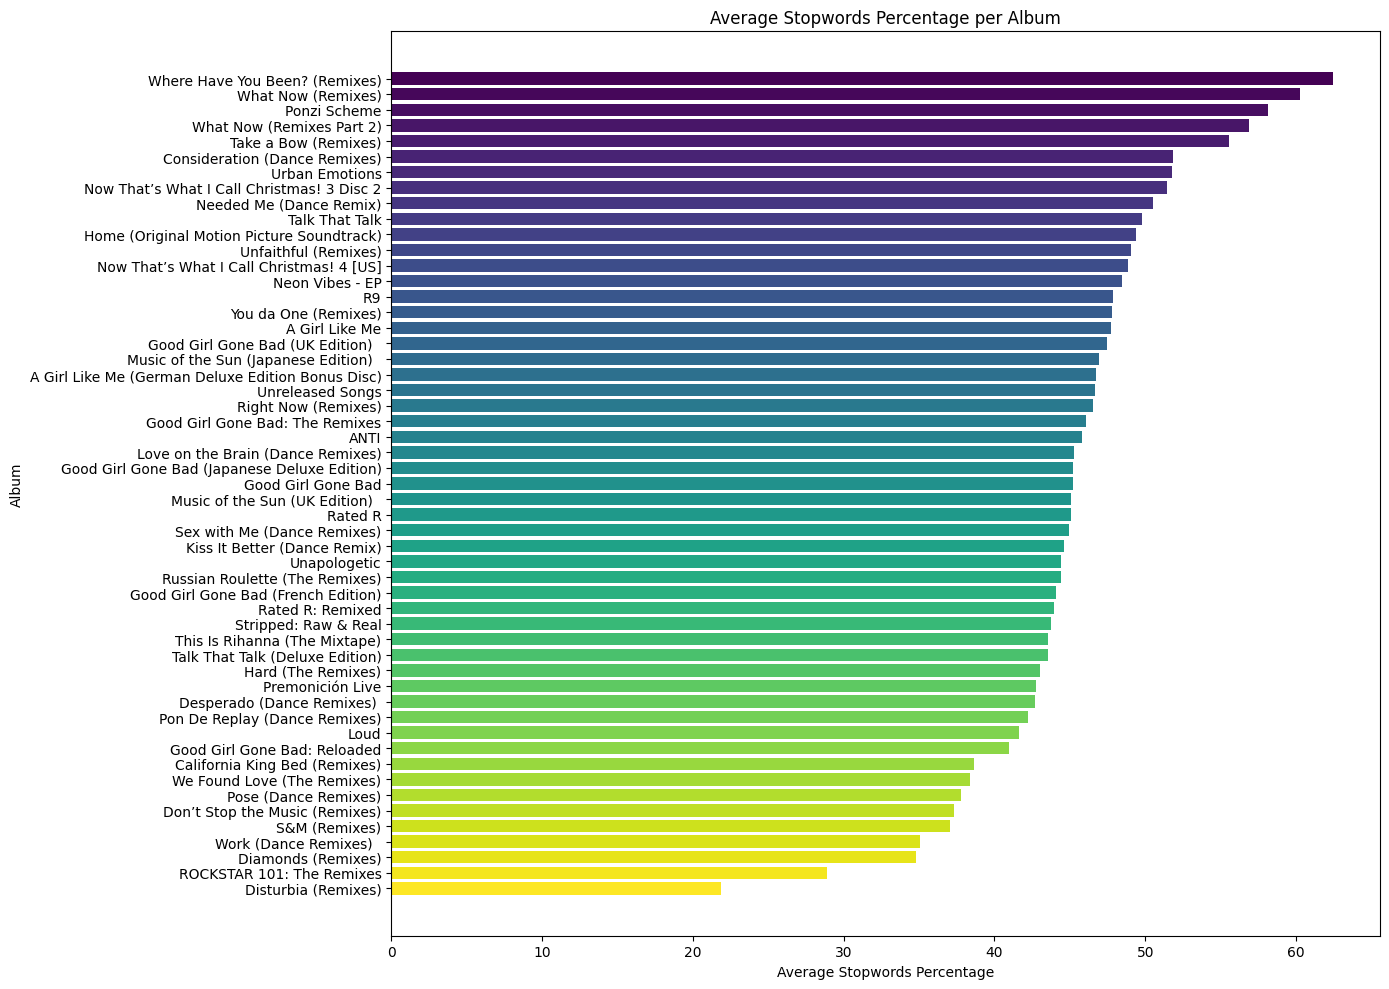

Bar chart showing average stopwords percentage per album displayed.


In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a color map for each album
colors = plt.cm.viridis(np.linspace(0, 1, len(df_album_stopwords_sorted)))

plt.figure(figsize=(14, 10)) # Adjusted figure size for better readability
plt.barh(df_album_stopwords_sorted['Album'], df_album_stopwords_sorted['stopwords_percentage'], color=colors)
plt.xlabel('Average Stopwords Percentage')
plt.ylabel('Album')
plt.title('Average Stopwords Percentage per Album')
plt.gca().invert_yaxis() # Invert y-axis to have highest percentage at the top
plt.tight_layout()
plt.show()
print("Bar chart showing average stopwords percentage per album displayed.")

### Method 2 Interpretation: Impact of Stopwords on Rihanna's Albums

*   The analysis of stopwords percentage across Rihanna's albums reveals varying levels of word complexity and lexical density. Albums with a higher average stopwords percentage, such as 'Where Have You Been? (Remixes)' (62.44%) and 'What Now (Remixes)' (60.28%), indicate that a larger portion of their lyrics consists of common, function words ('the', 'a', 'is', 'to'). This might suggest that these songs rely more on rhythm, melody, or repetition rather than highly descriptive or unique vocabulary.

*   Conversely, albums with lower stopwords percentages, such as 'California King Bed (Remixes)' (38.65%) and 'Talk That Talk (Deluxe Edition)' (42.66%), suggest a higher proportion of content-rich words. This could mean that the lyrical content in these albums is more direct, contains more unique expressions, or focuses more on specific themes without relying heavily on common linguistic connectors.

*   The presence of remix albums ('Where Have You Been? (Remixes)', 'What Now (Remixes)', 'Take a Bow (Remixes)') at the higher end of the stopwords percentage suggests that remixes might often emphasize choruses or repetitive phrases, which tend to use more stopwords, or that their lyrical structure is less dense with unique vocabulary compared to original tracks or other album types.


## Method 3

Question 3:
Do the top keywords show a recurring theme in different albums of Rihanna's?


#### Cell below shows process of extracting top keywords per album by tokenizing the `cleaned_lyric` for each song, calculate word frequencies, and then aggregating these frequencies to find the top occurring keywords for each album.


In [21]:
from collections import Counter
import nltk

# Initialize an empty dictionary to store top keywords for each album
album_keywords = {}

# Iterate through each unique album in the df_chat DataFrame
for album in df_chat['Album'].dropna().unique():
    # Filter df_chat to get all rows belonging to that album
    album_df = df_chat[df_chat['Album'] == album]

    # Concatenate all cleaned_lyric strings for the current album into a single large string
    all_lyrics_for_album = ' '.join(album_df['cleaned_lyric'].tolist())

    # Tokenize the concatenated string into individual words
    words = nltk.word_tokenize(all_lyrics_for_album)

    # Use collections.Counter to count the frequency of each word
    word_counts = Counter(words)

    # Get the 10 most common words and their counts
    top_10_words = word_counts.most_common(10)

    # Store these top 10 keywords and their frequencies in the album_keywords dictionary
    album_keywords[album] = top_10_words

print("Top keywords extracted for each album and stored in 'album_keywords' dictionary.")

# Display a sample of the results
for album, keywords in list(album_keywords.items())[:3]:
    print(f"\nAlbum: {album}")
    for word, count in keywords:
        print(f"  - {word}: {count}")

Top keywords extracted for each album and stored in 'album_keywords' dictionary.

Album: ANTI
  - night: 186
  - oh: 89
  - work: 84
  - yeah: 68
  - know: 53
  - dont: 45
  - like: 44
  - love: 38
  - get: 38
  - im: 29

Album: Unapologetic
  - im: 125
  - jump: 124
  - phresh: 92
  - love: 78
  - like: 63
  - get: 55
  - going: 55
  - yeah: 51
  - runway: 50
  - numb: 49

Album: Good Girl Gone Bad
  - dont: 70
  - know: 62
  - im: 62
  - like: 59
  - got: 56
  - baby: 55
  - music: 52
  - rihanna: 50
  - oh: 50
  - love: 47


## Visualize Top Keywords for each album to help with visually identify recurring themes.


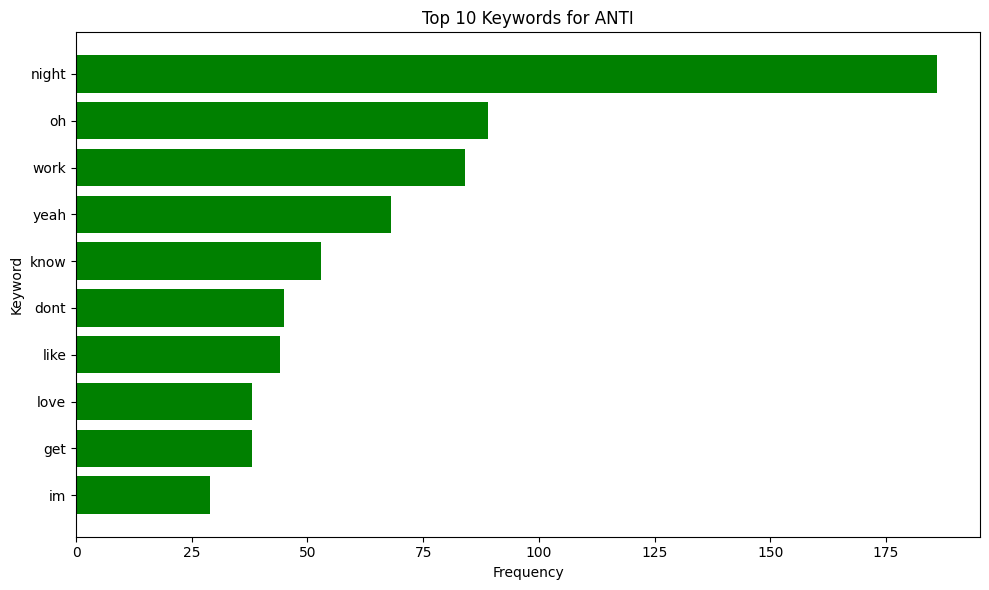

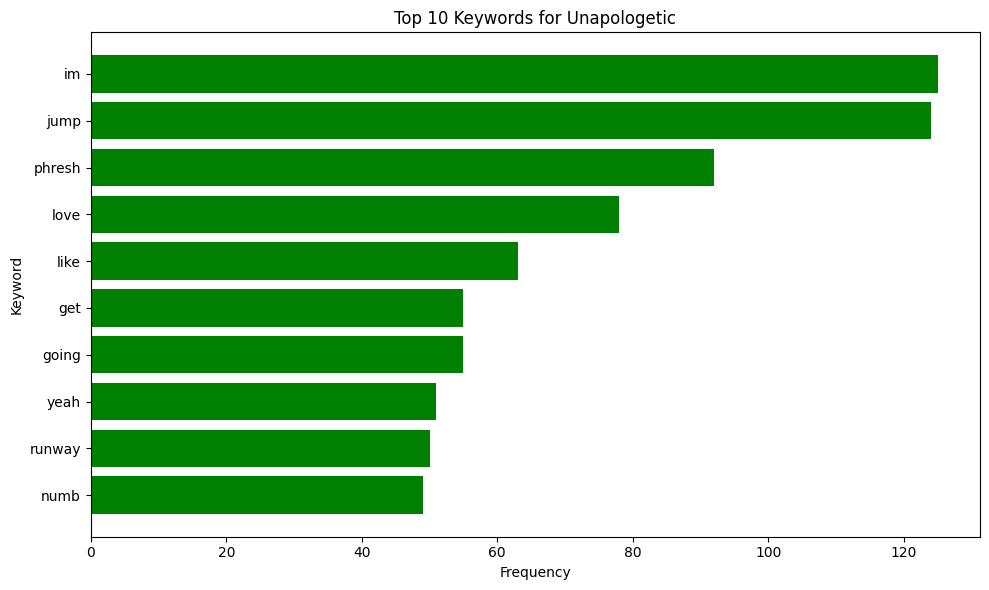

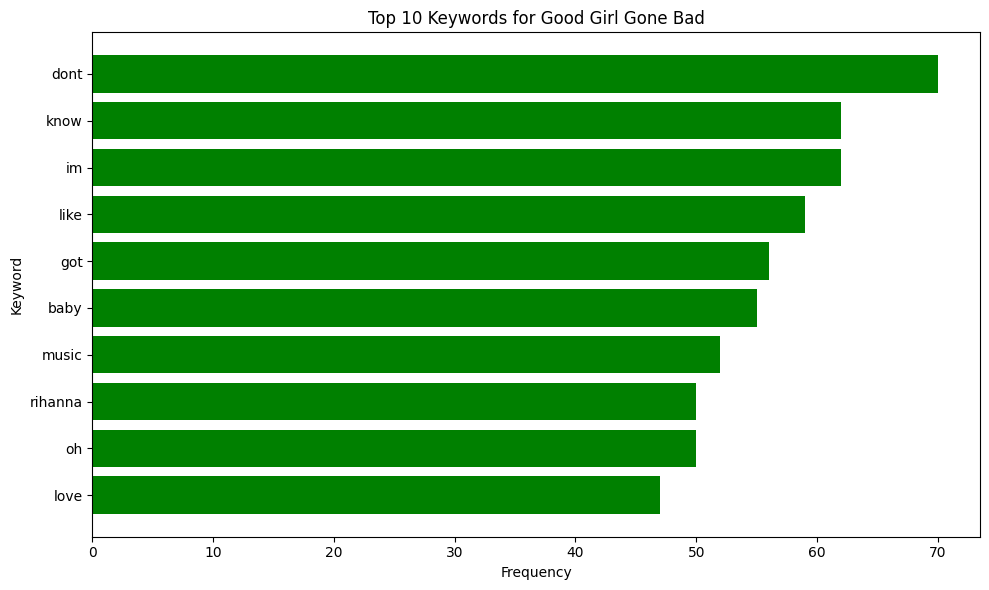

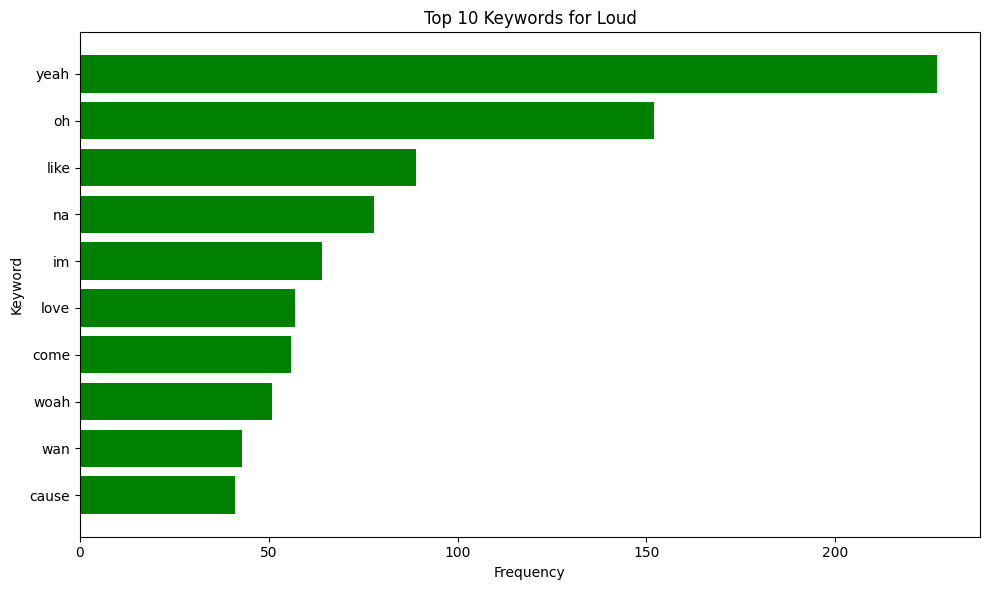

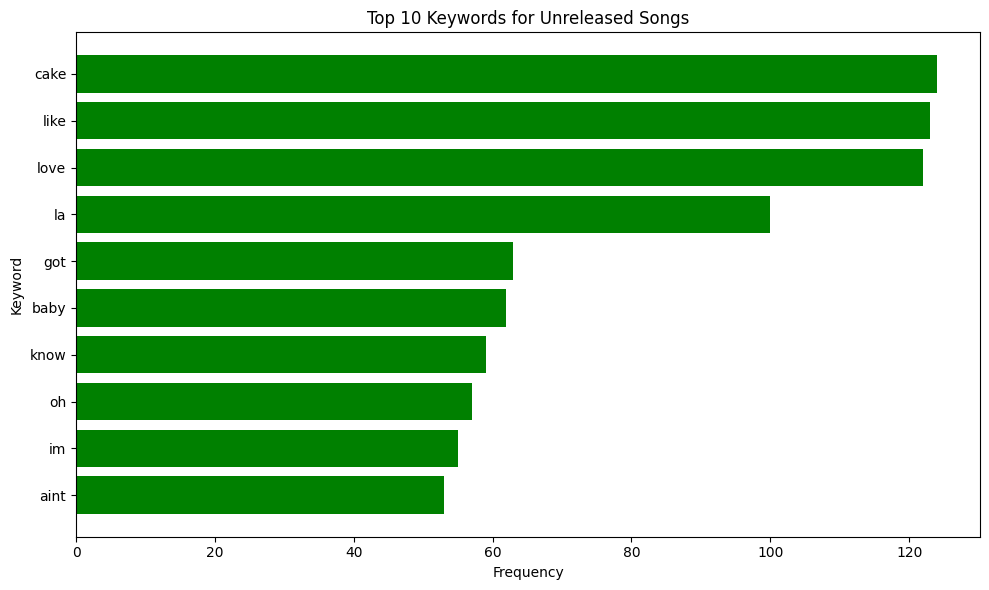

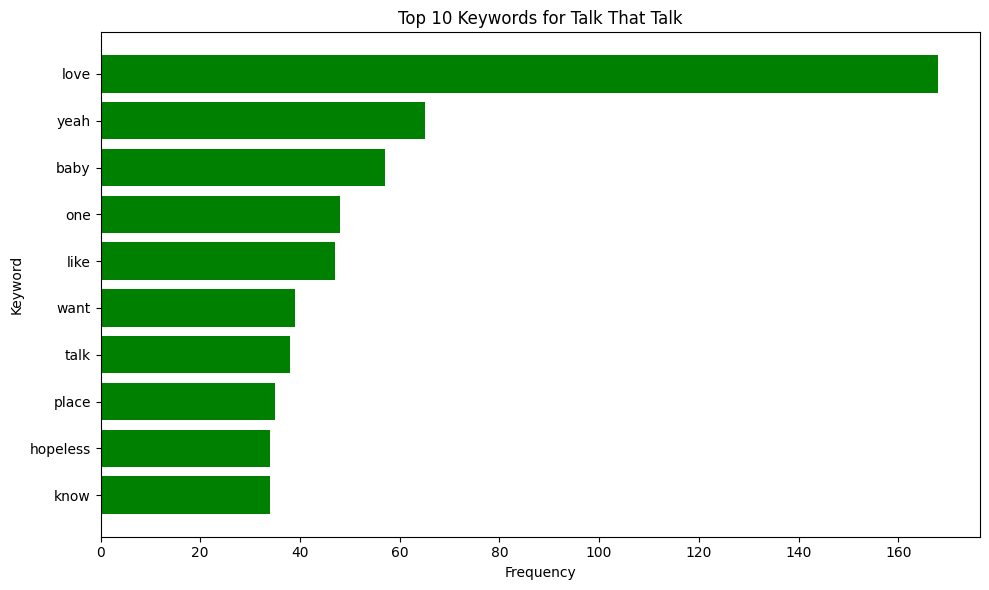

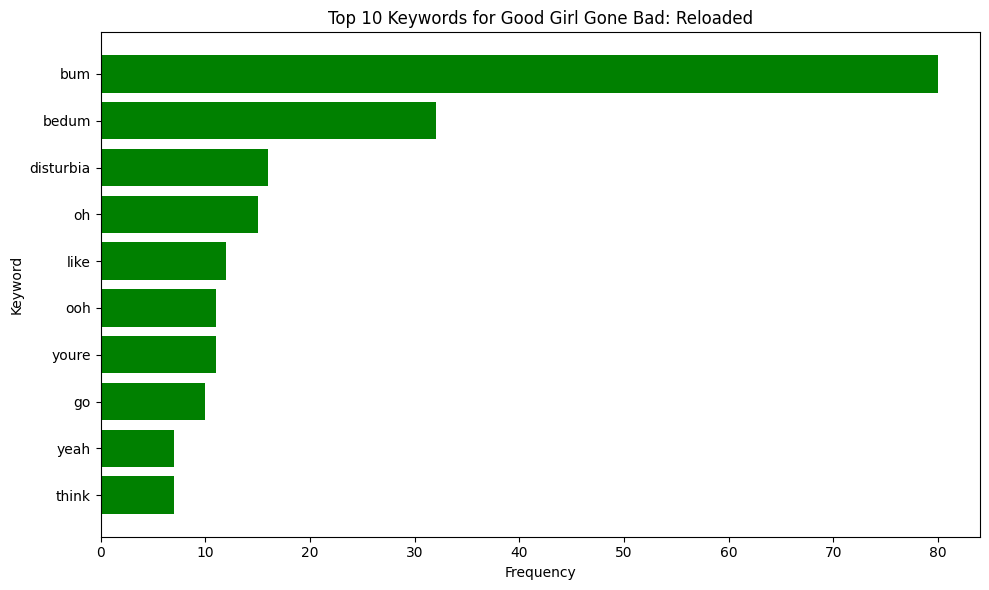

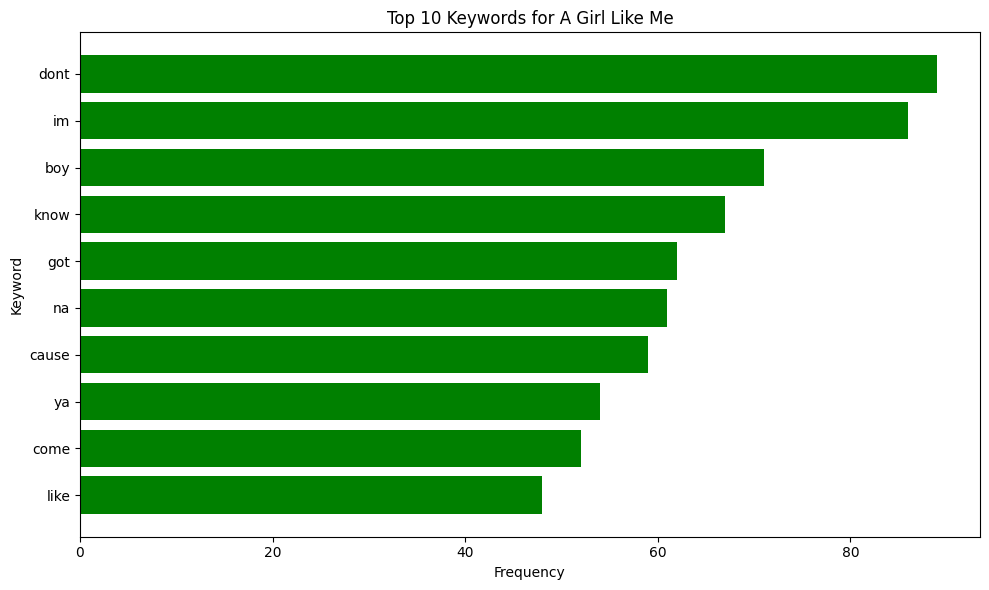

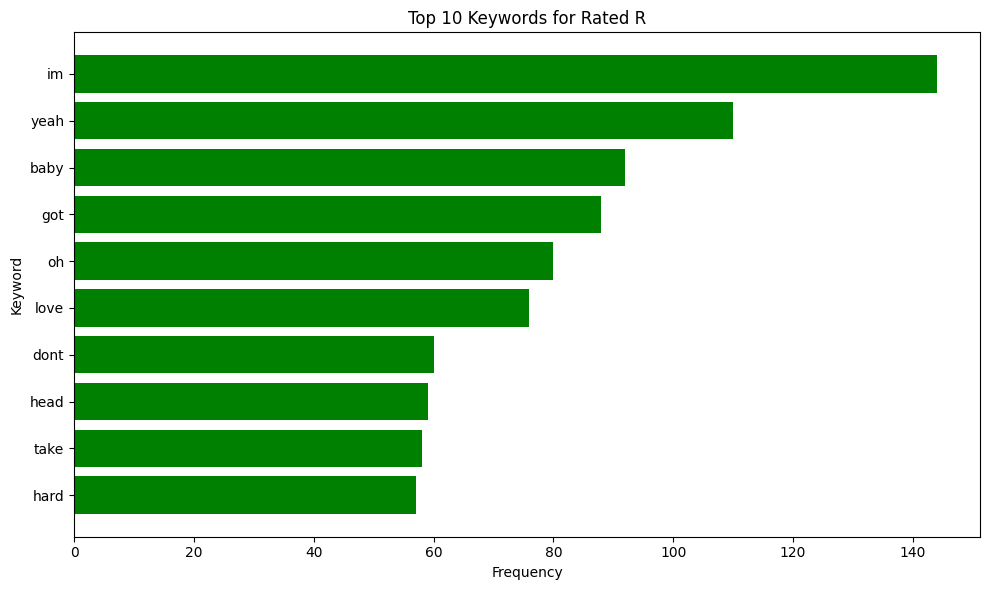

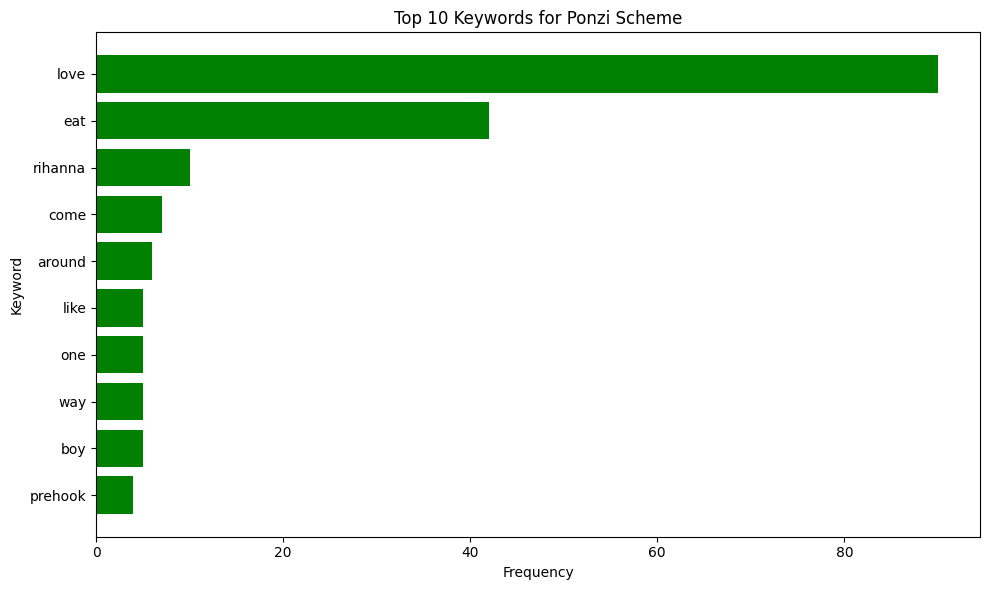

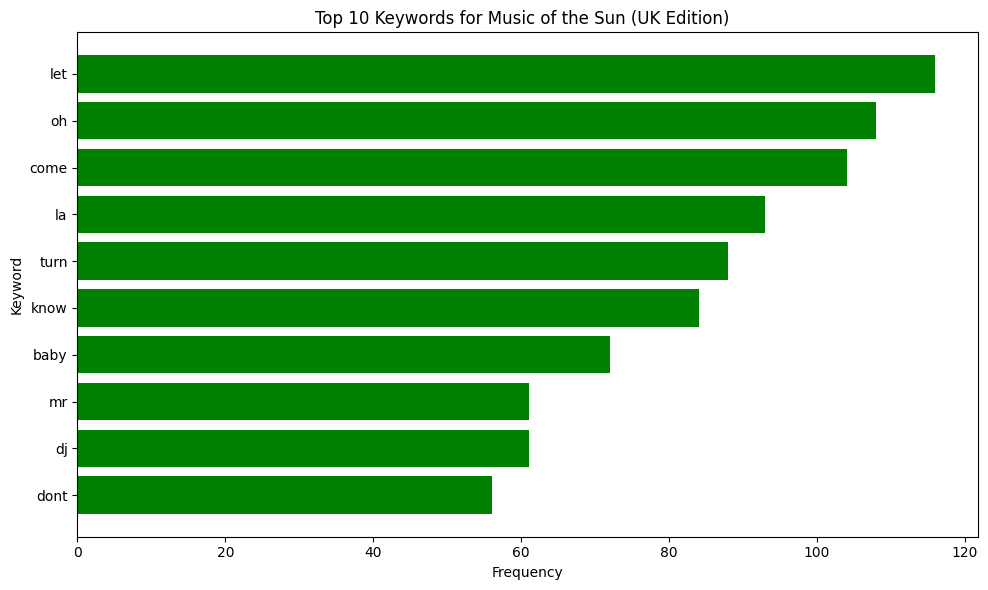

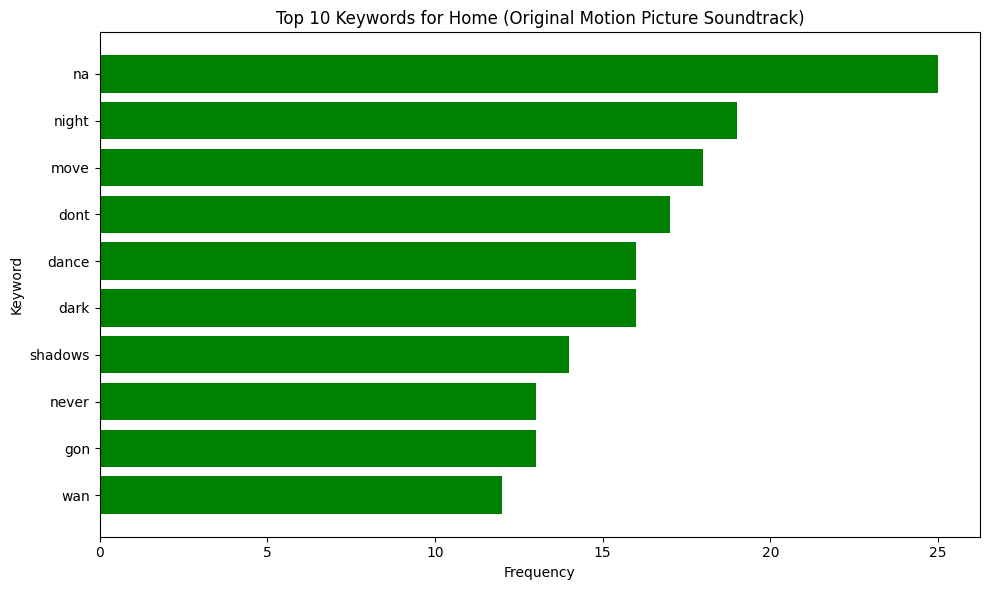

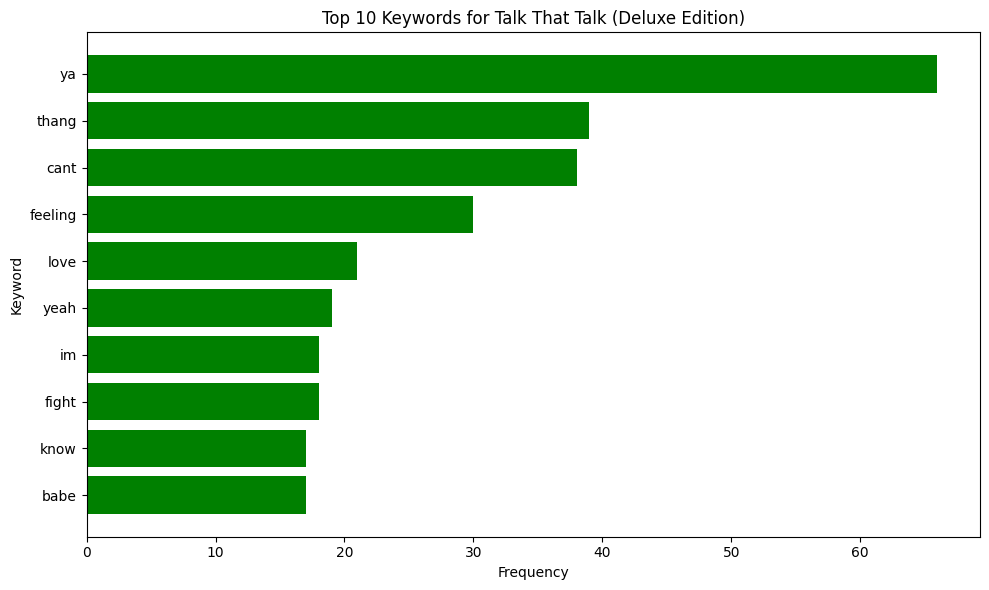

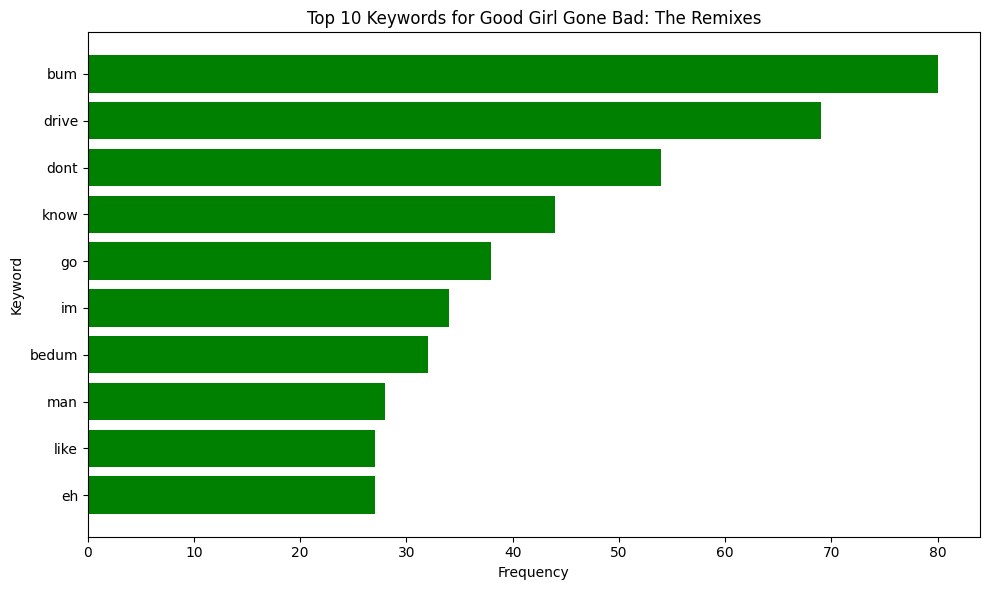

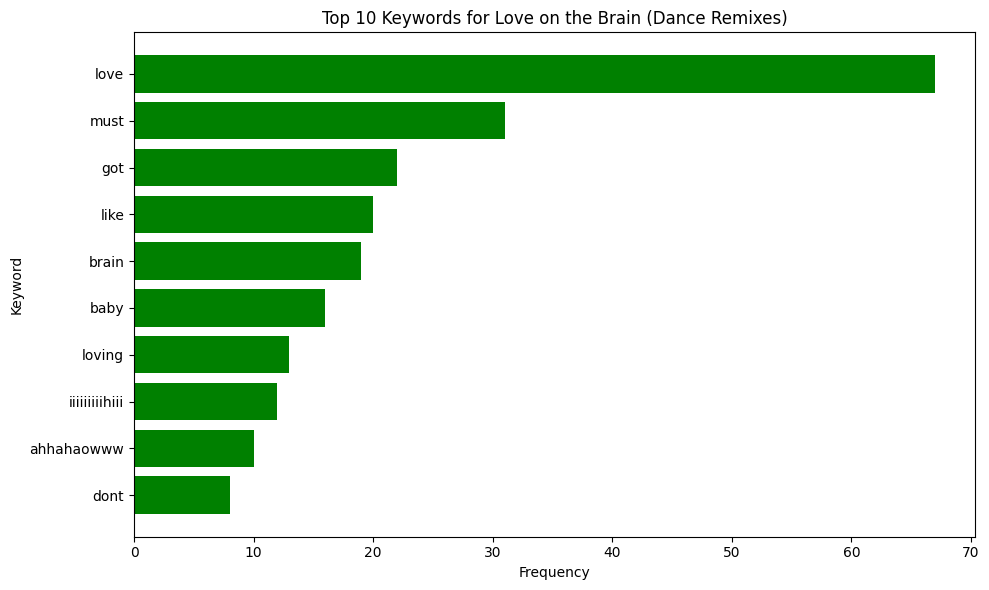

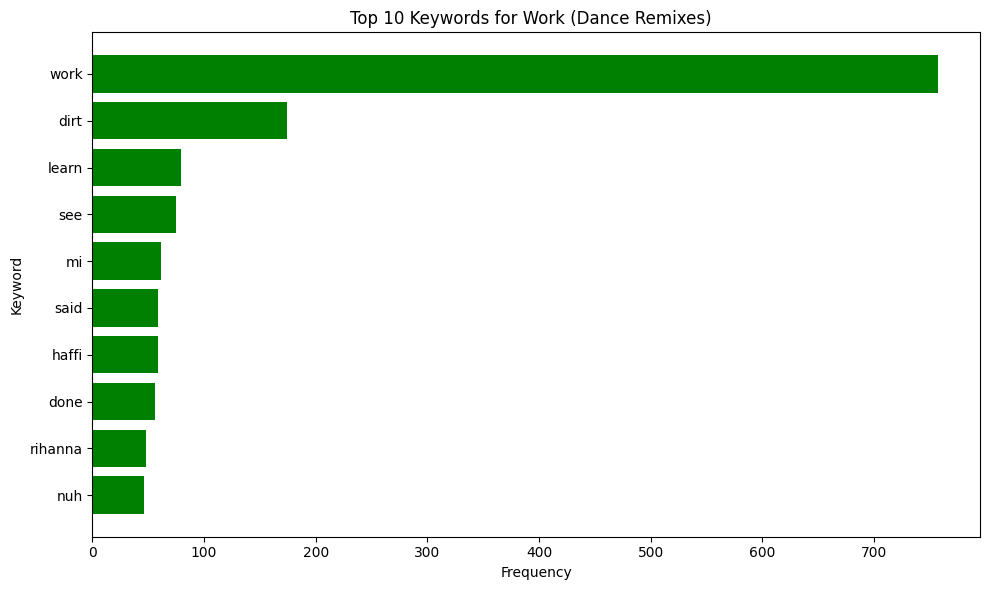

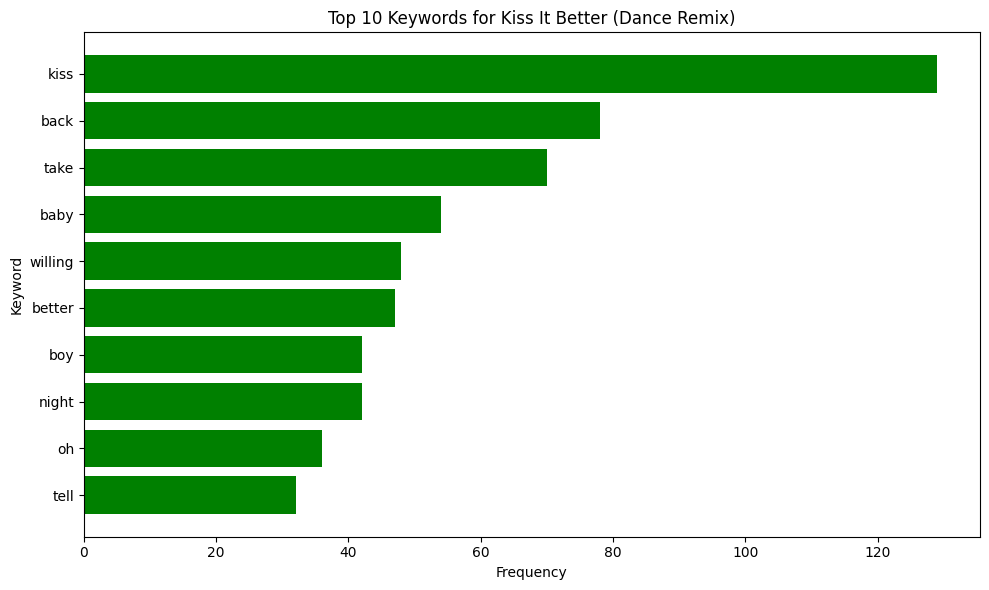

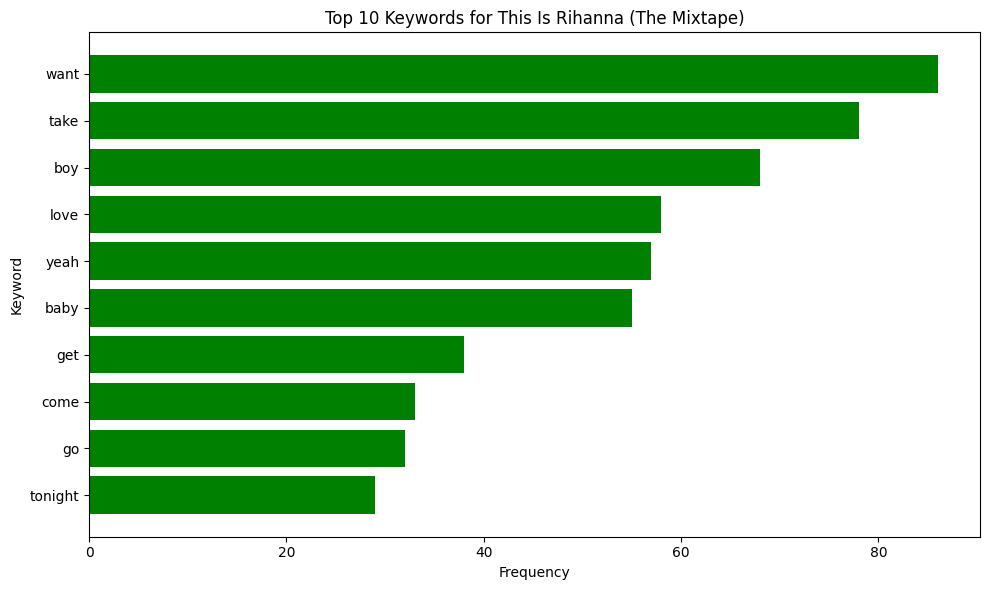

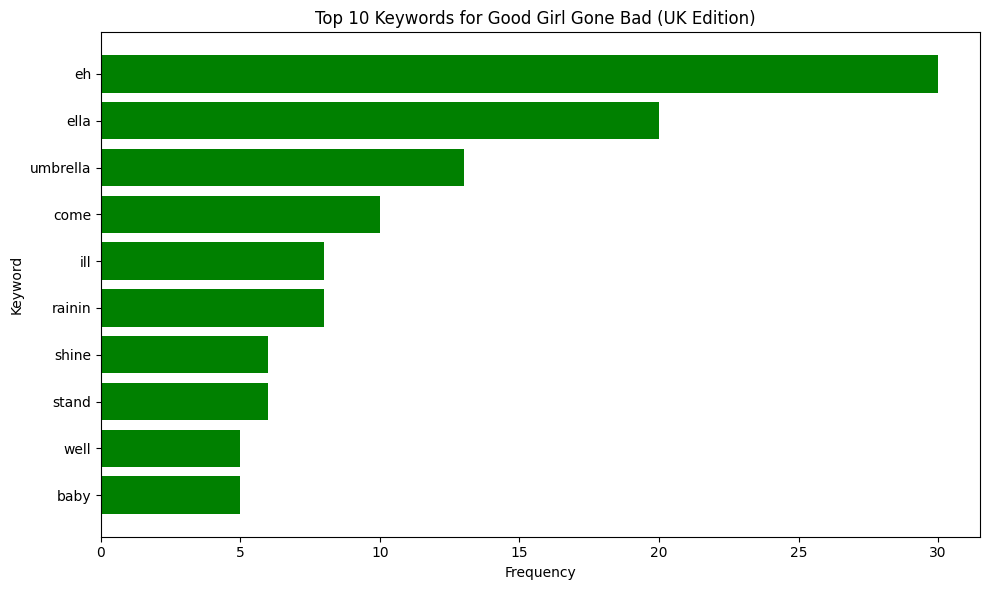

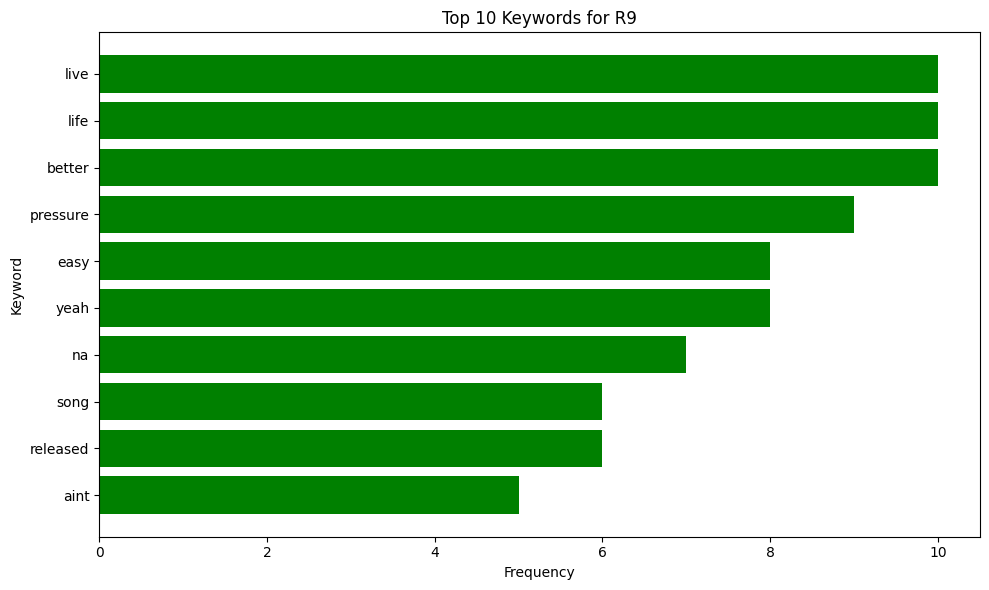

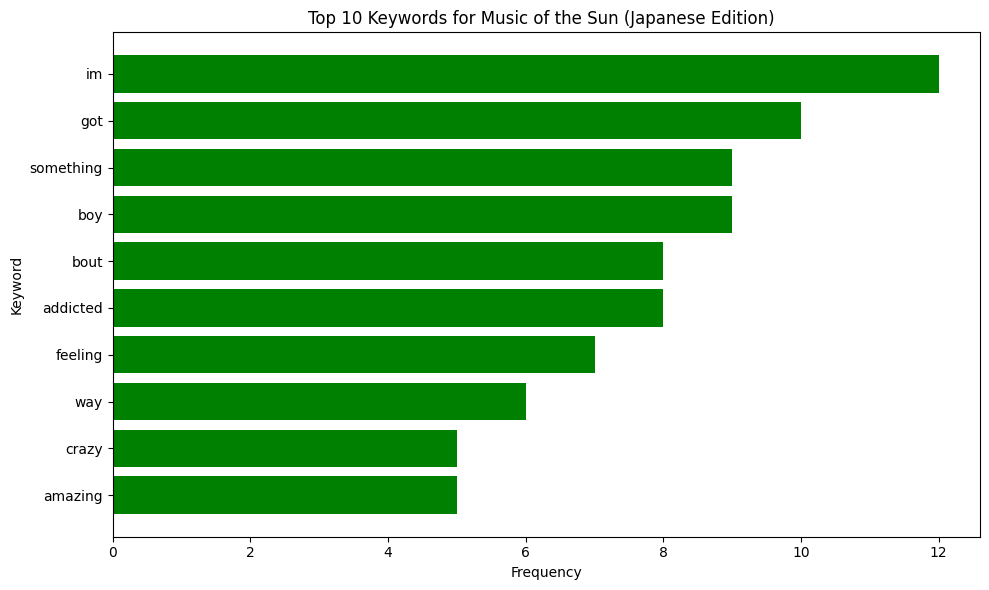

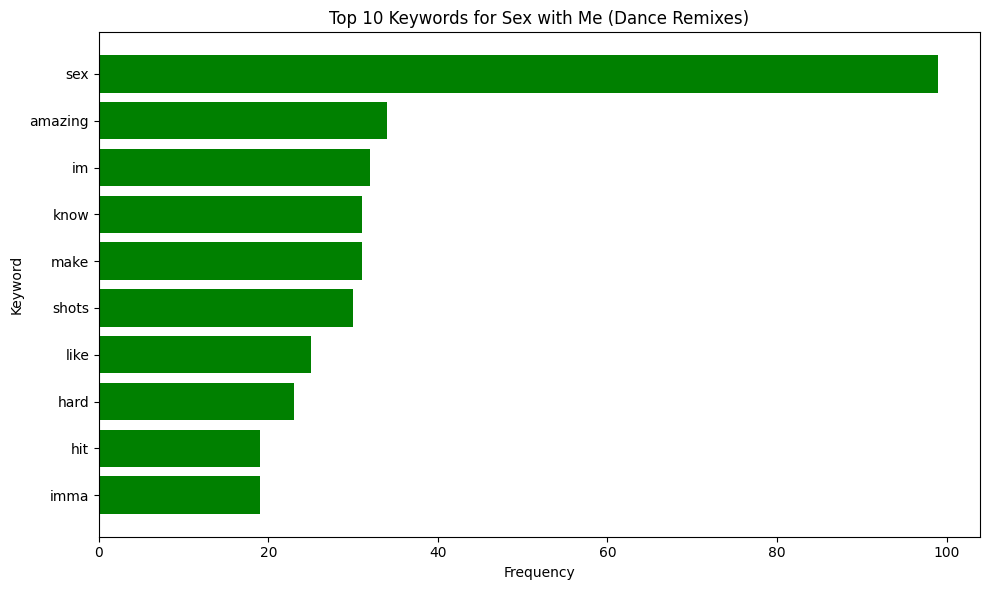

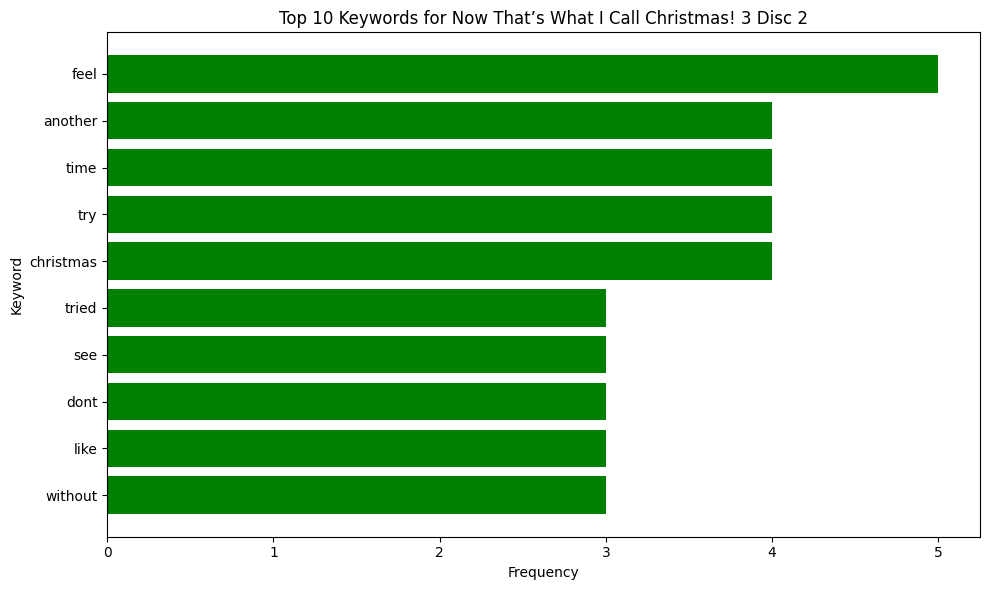

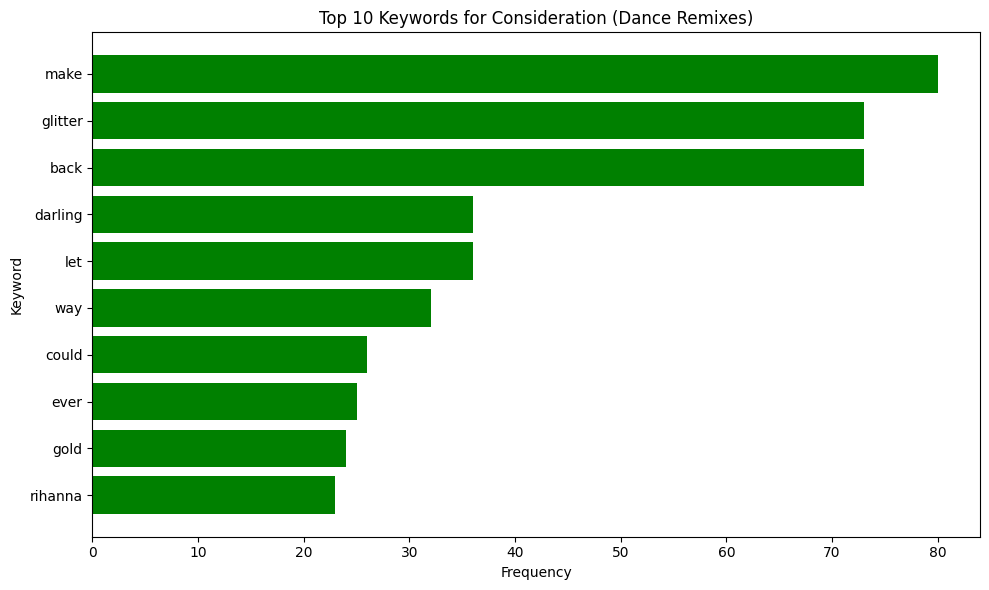

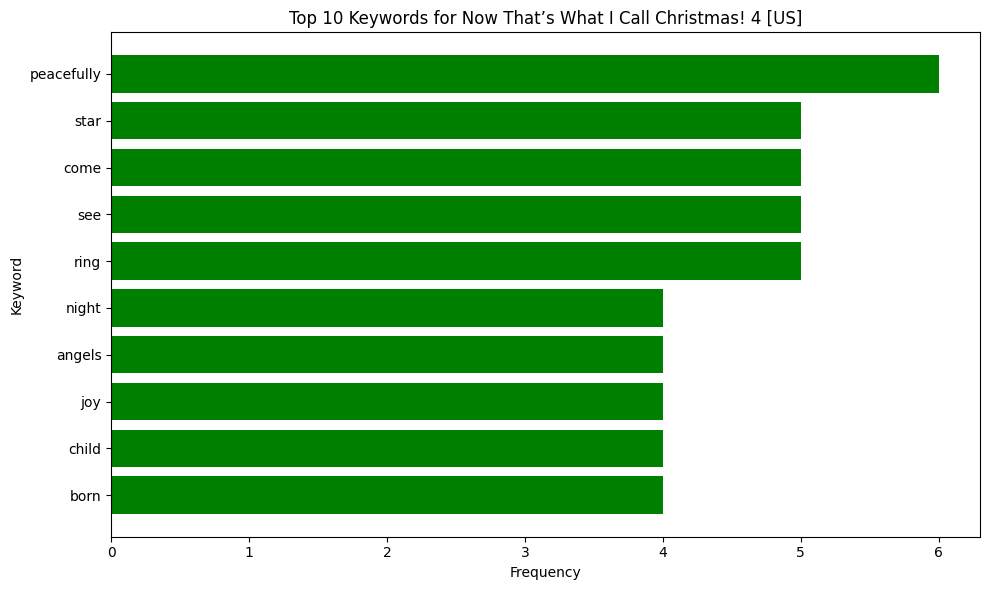

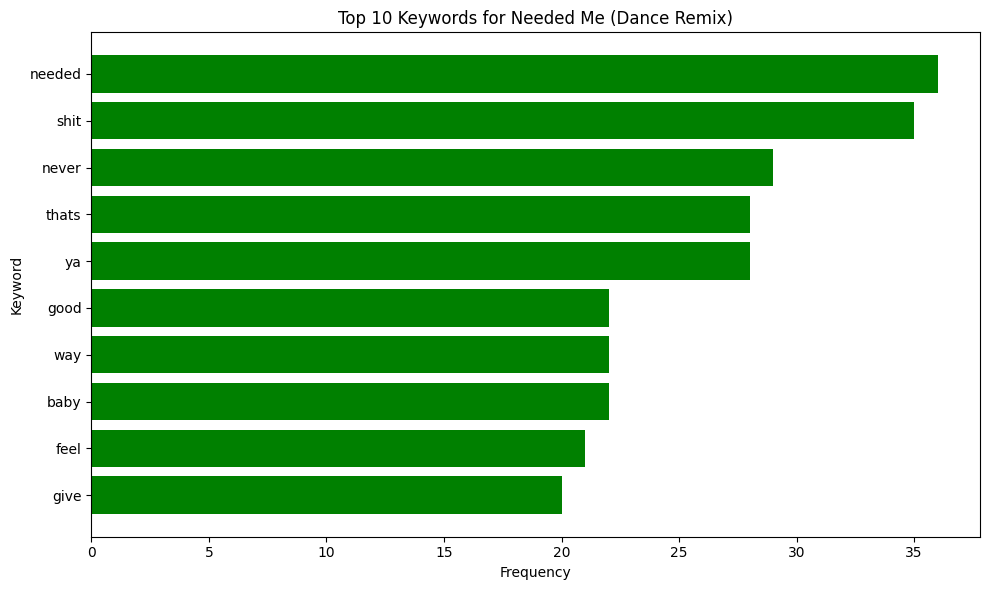

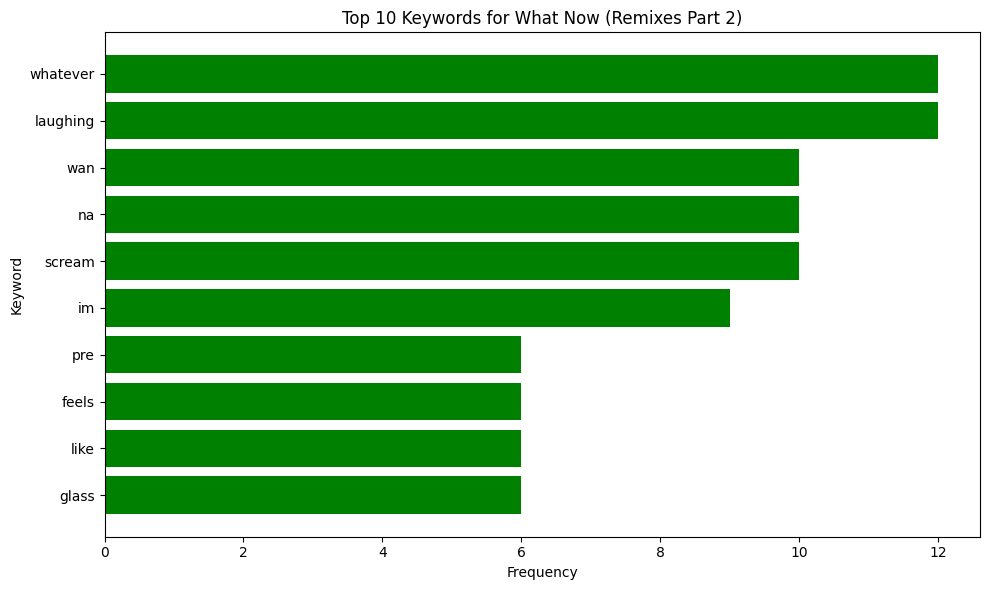

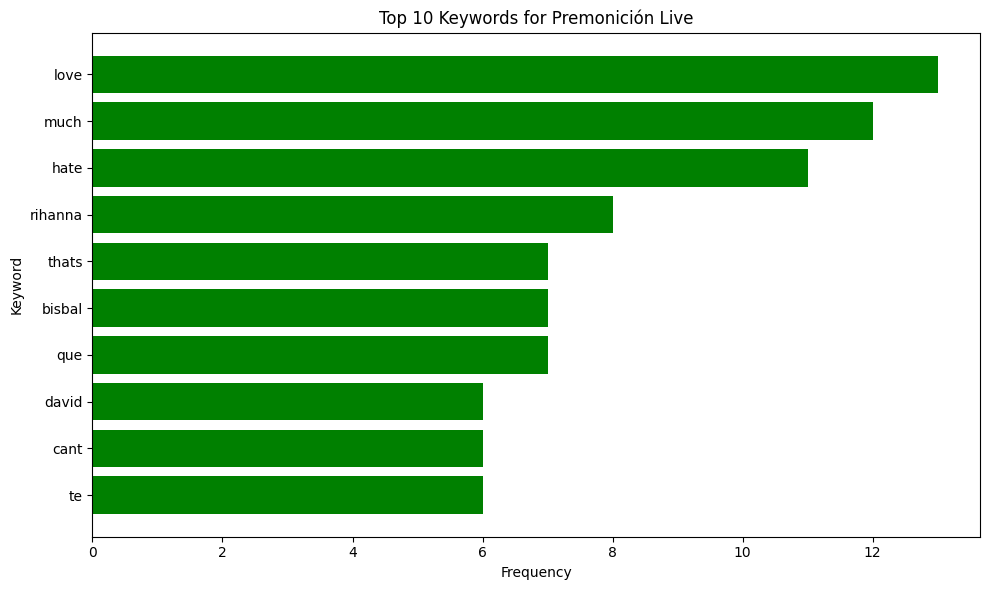

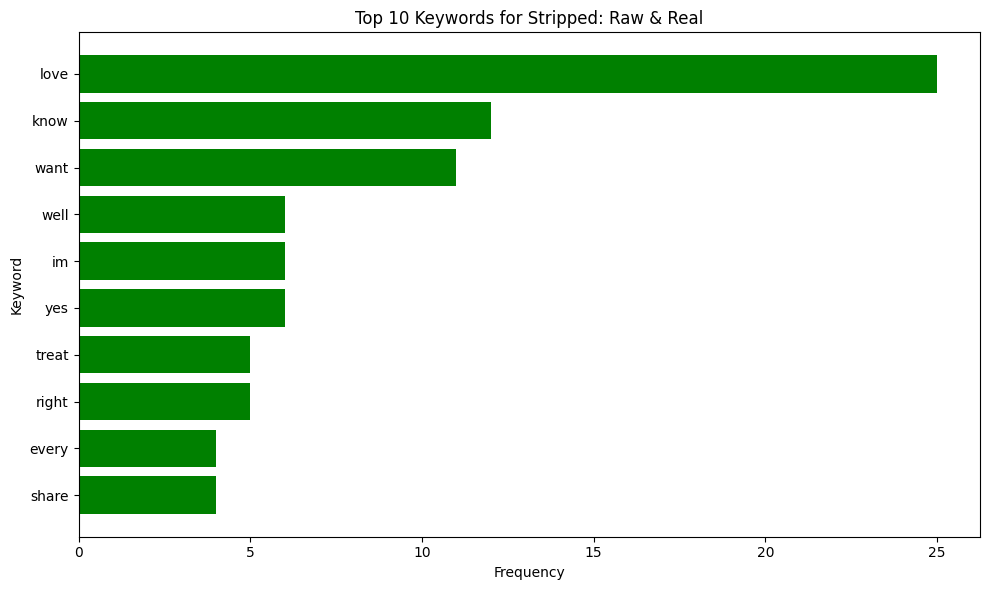

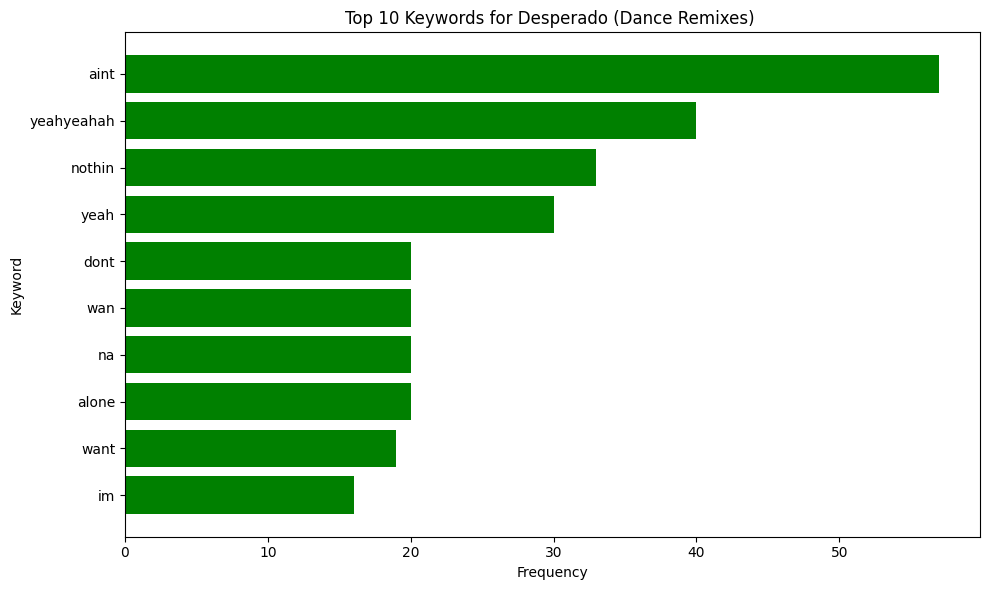

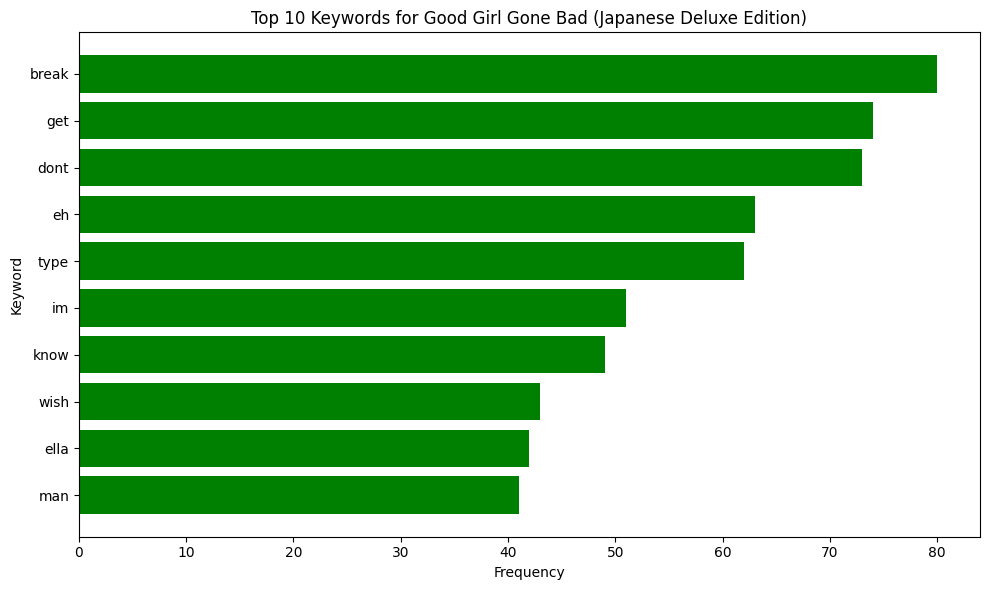

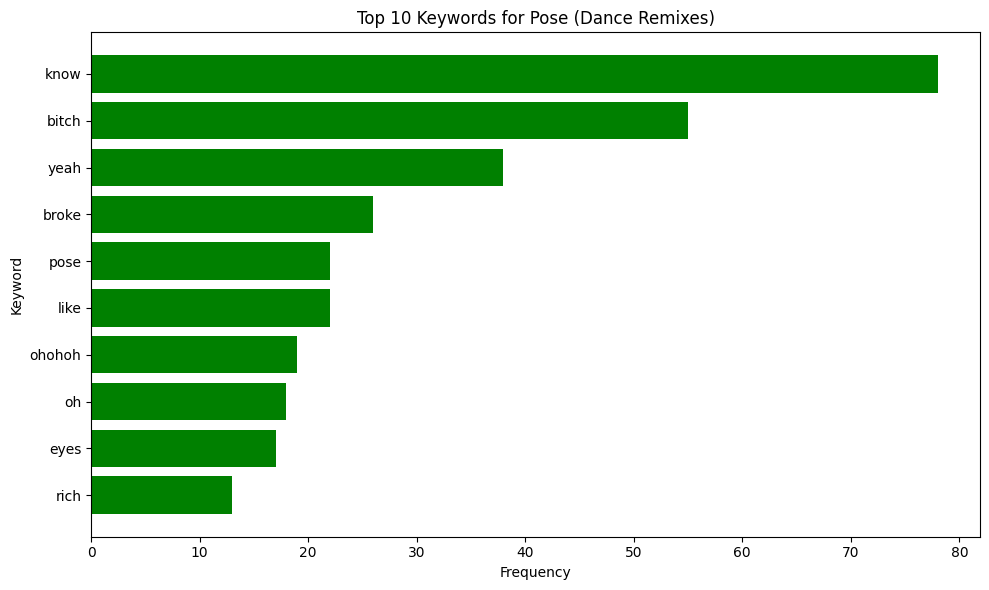

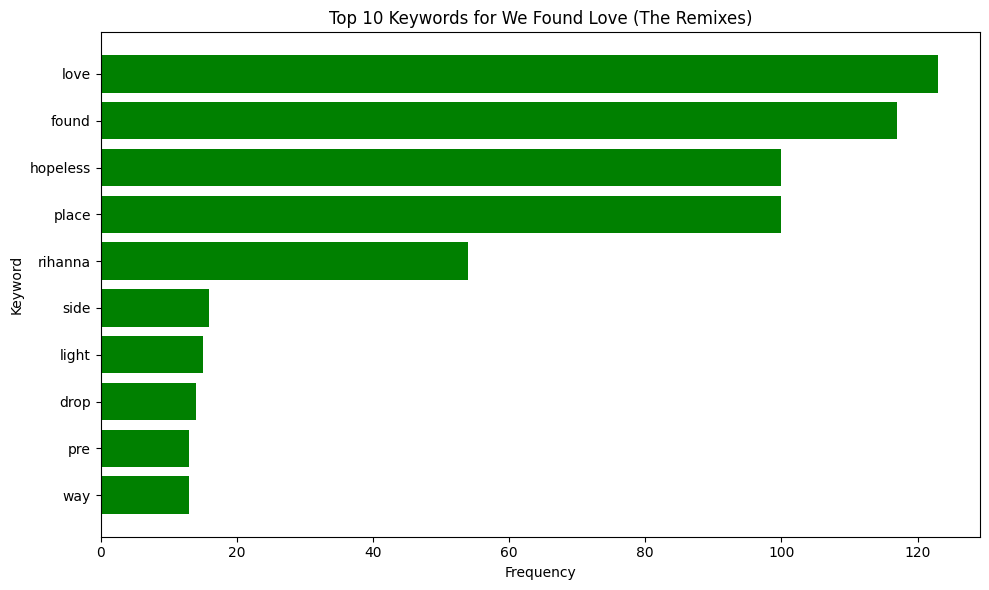

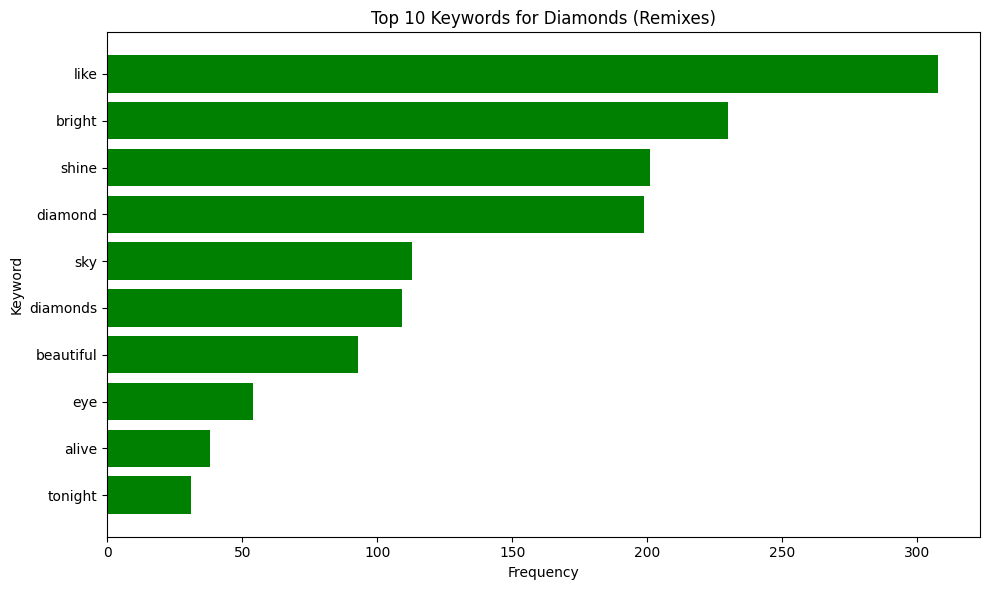

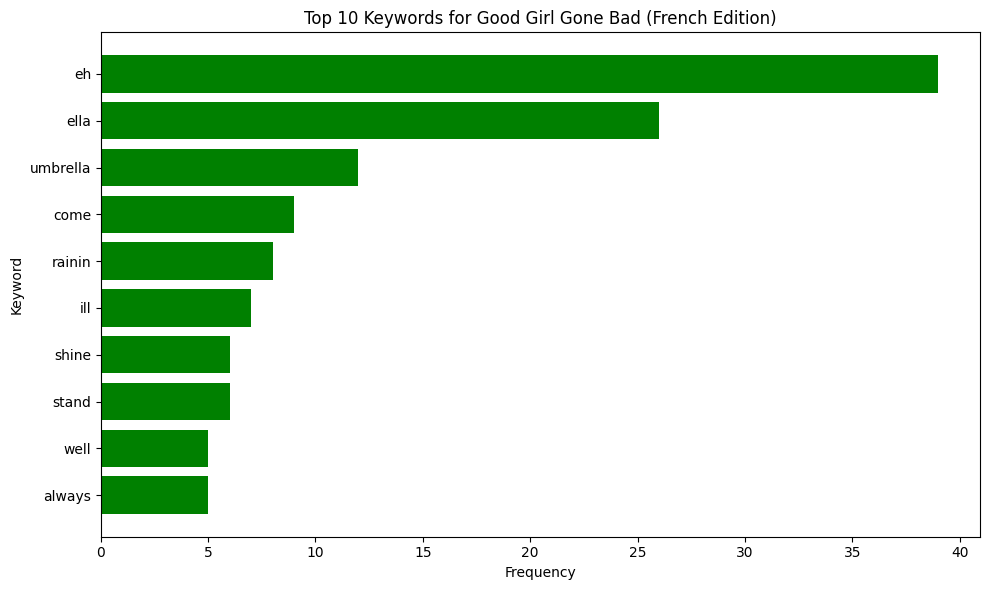

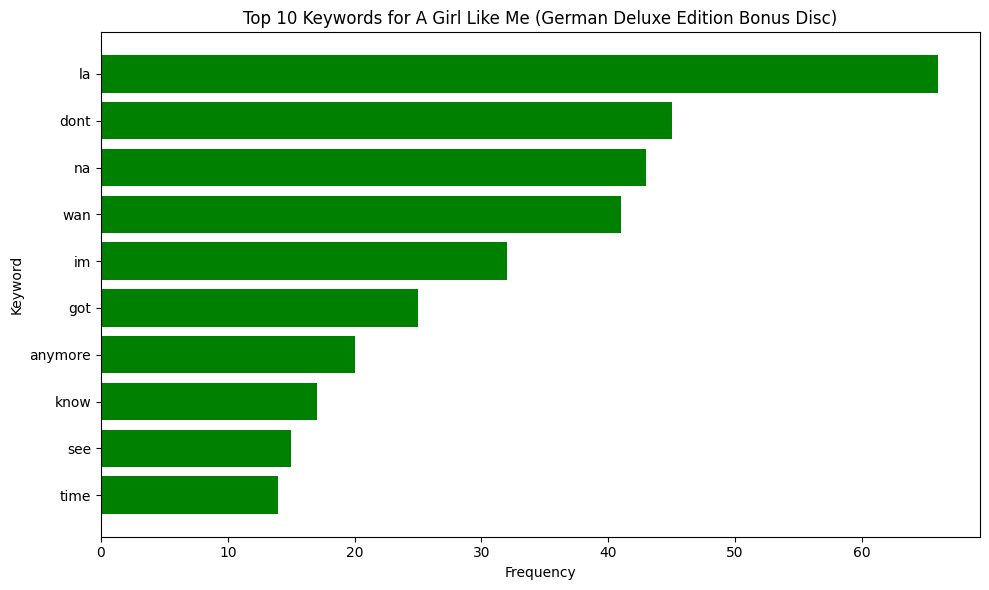

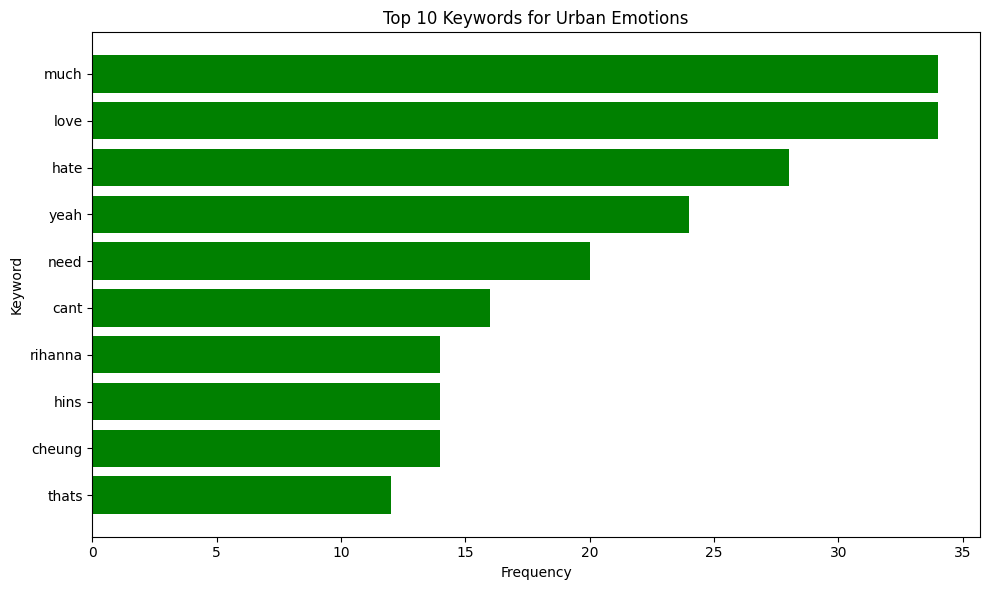

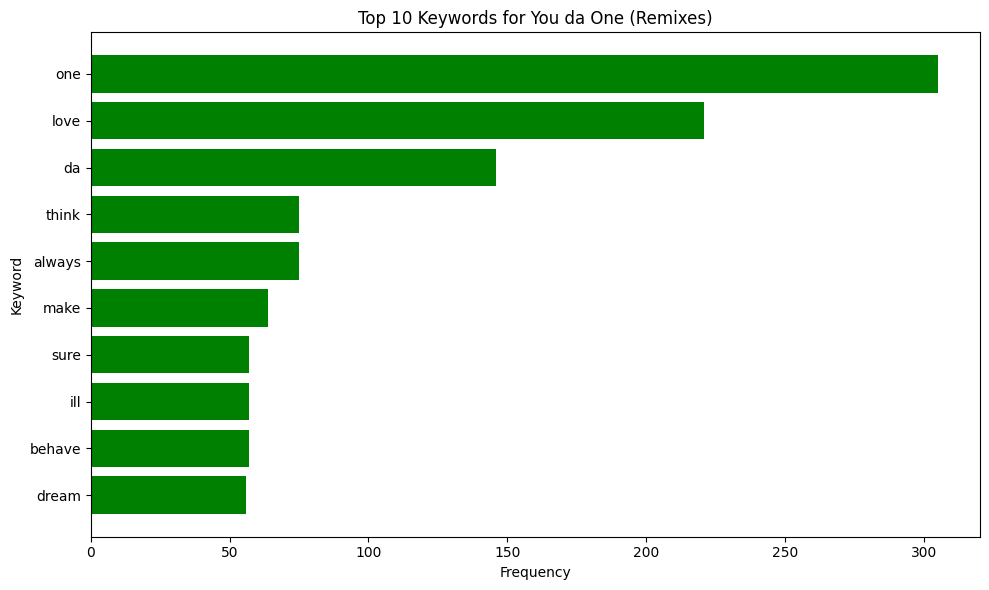

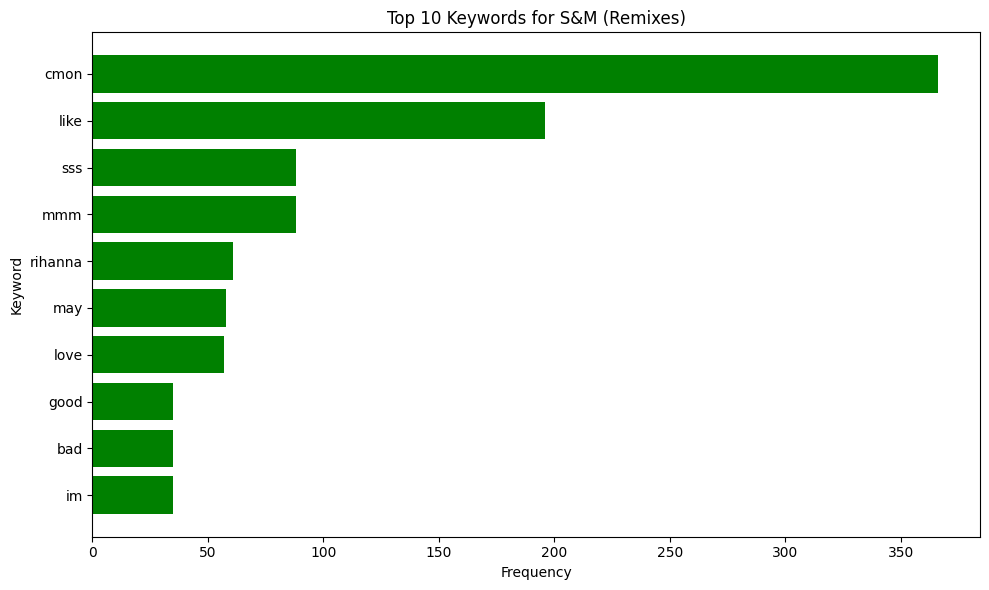

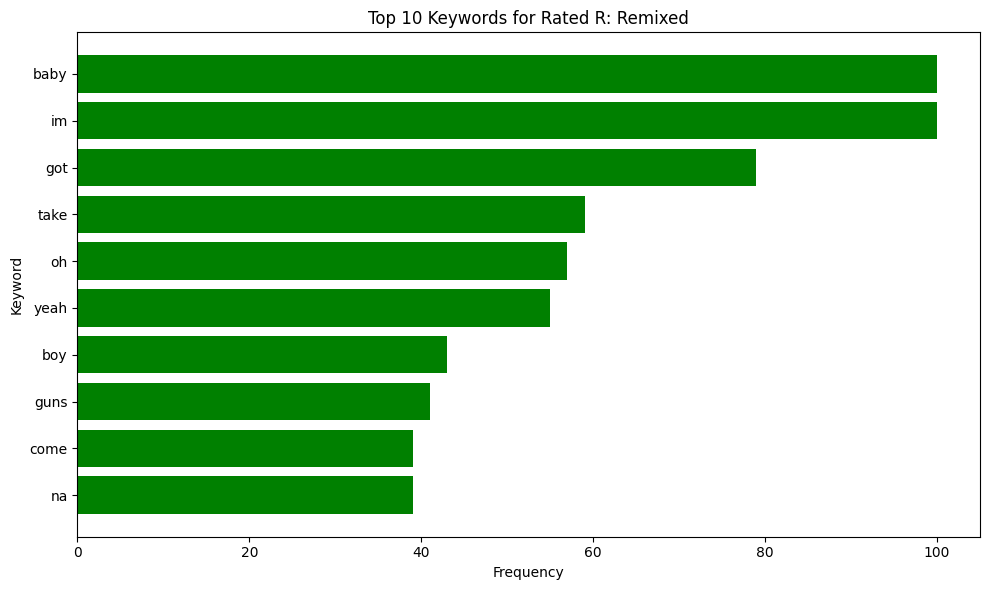

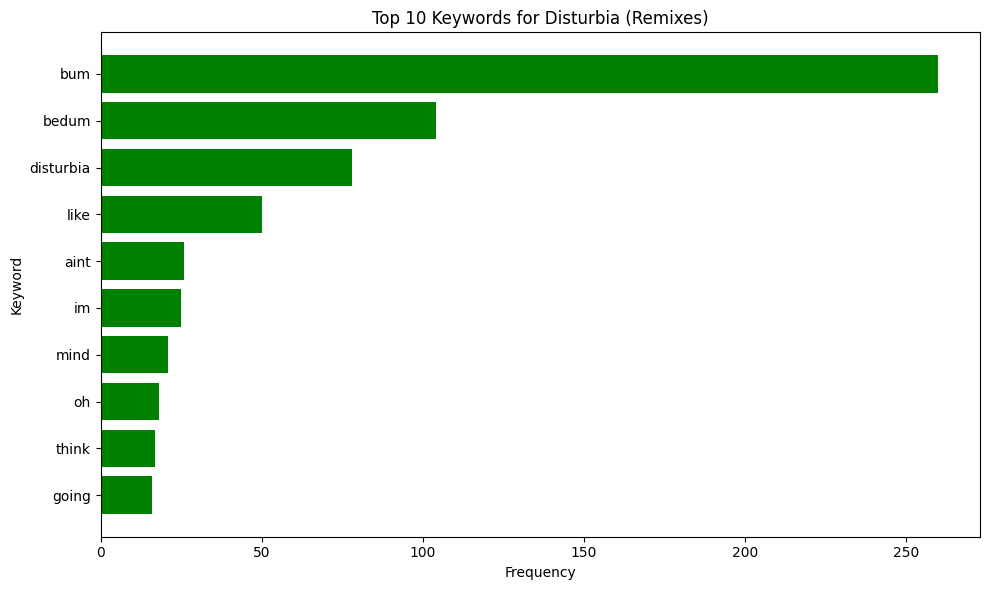

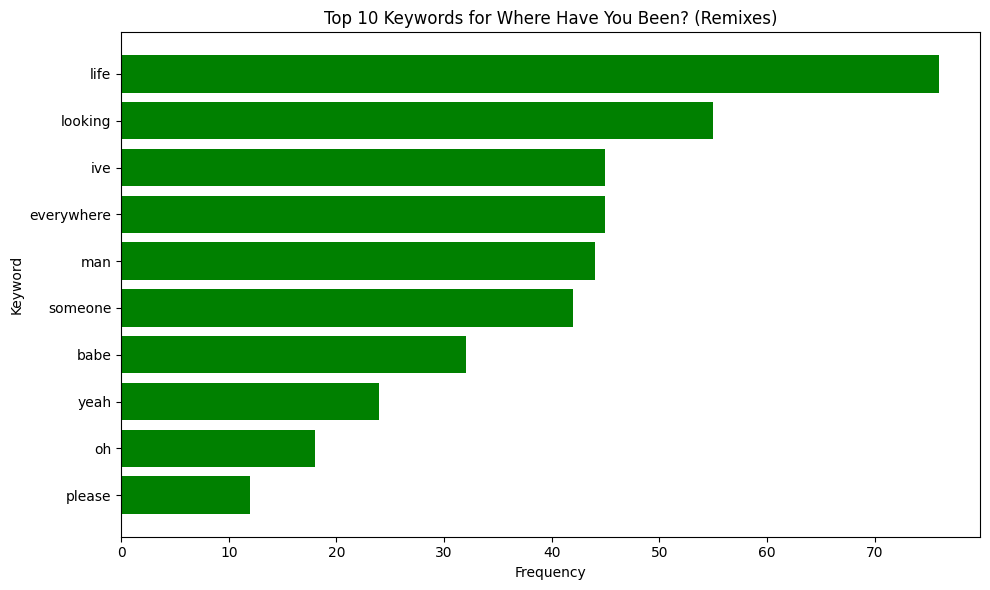

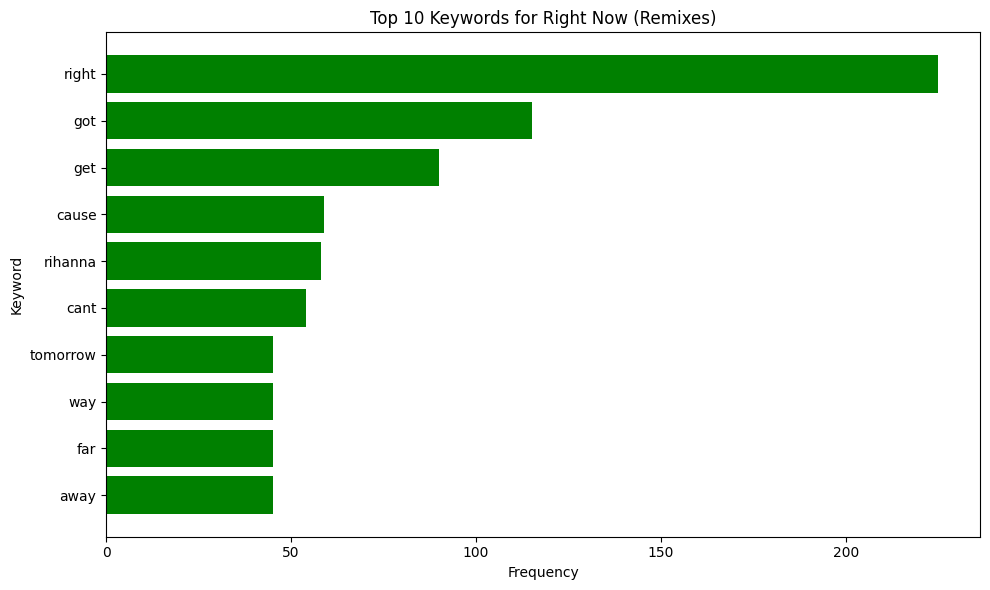

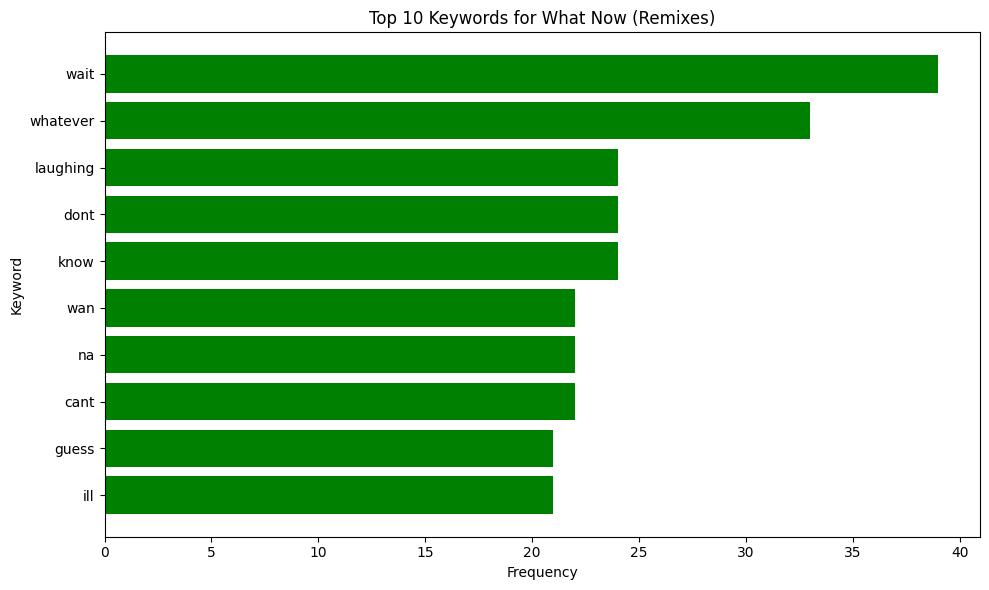

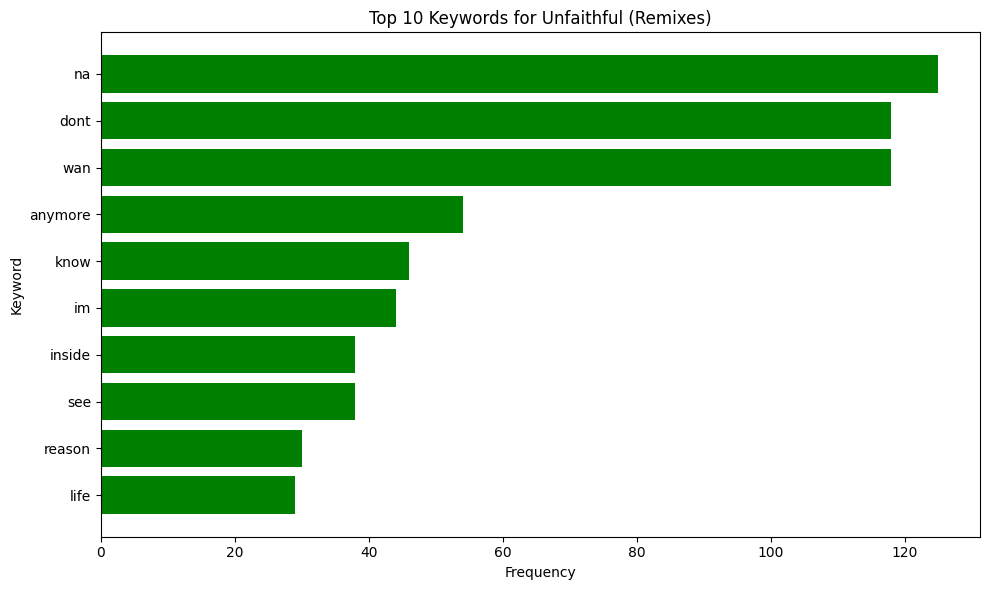

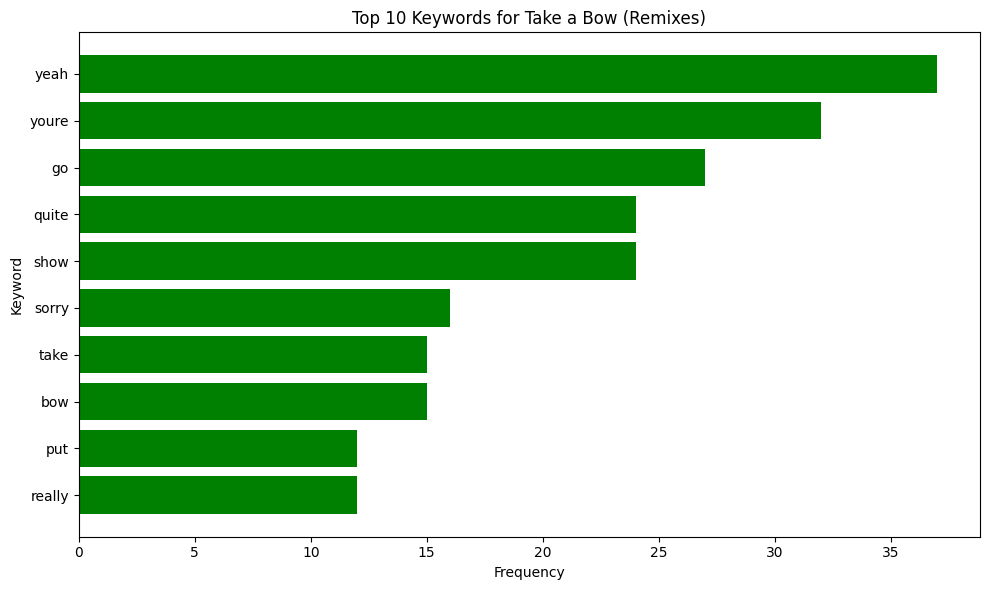

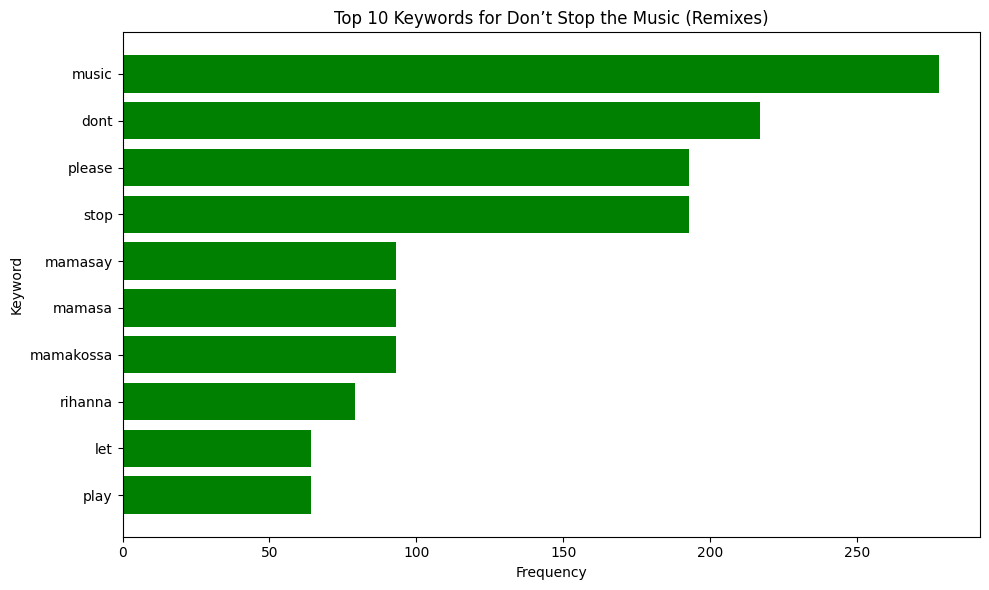

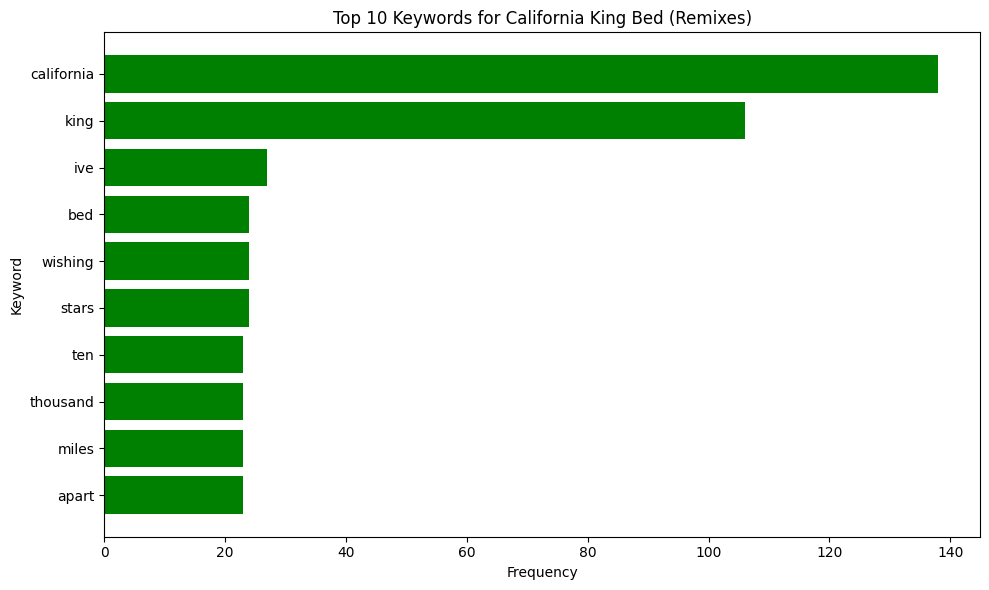

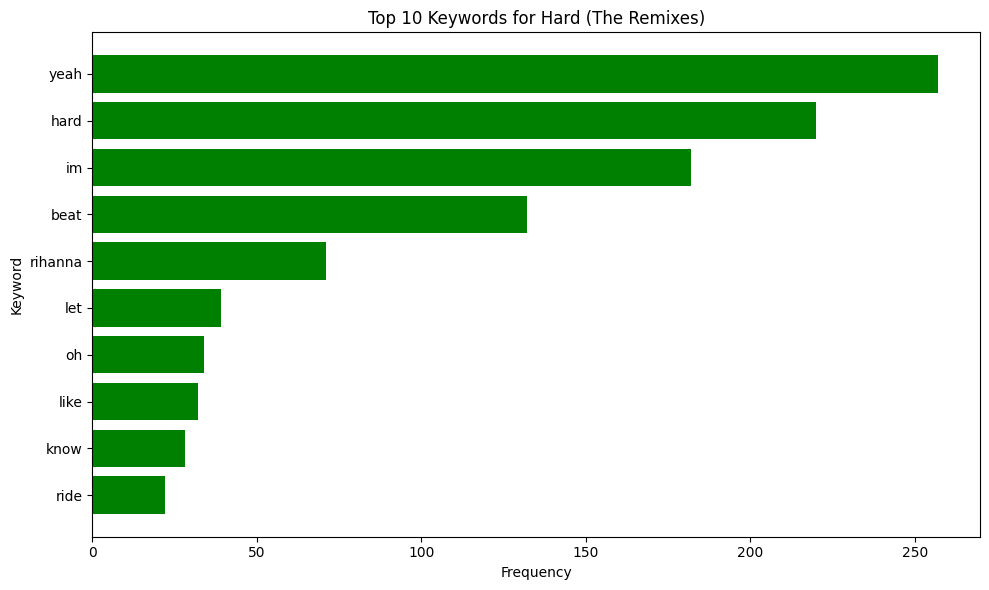

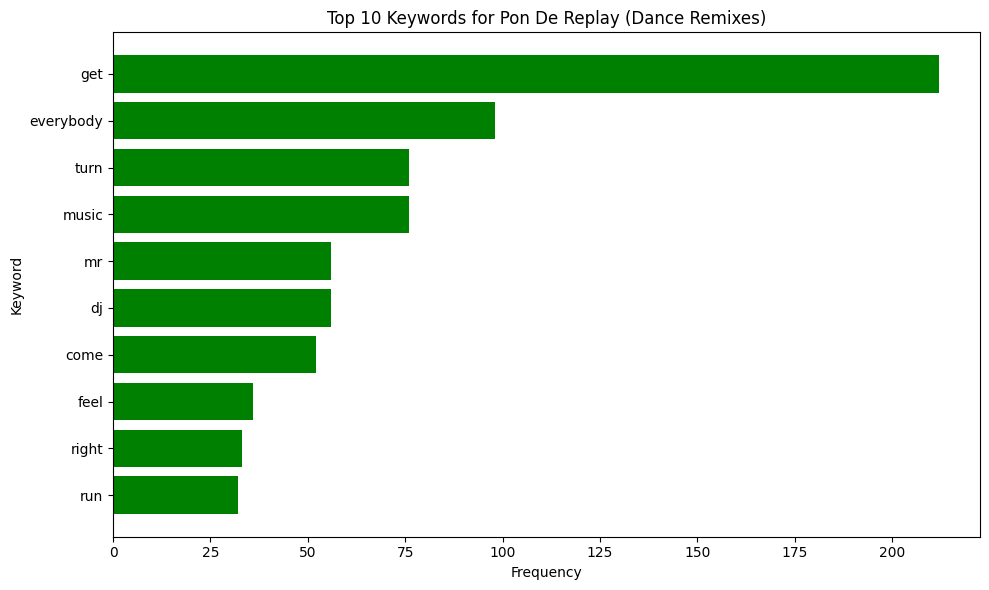

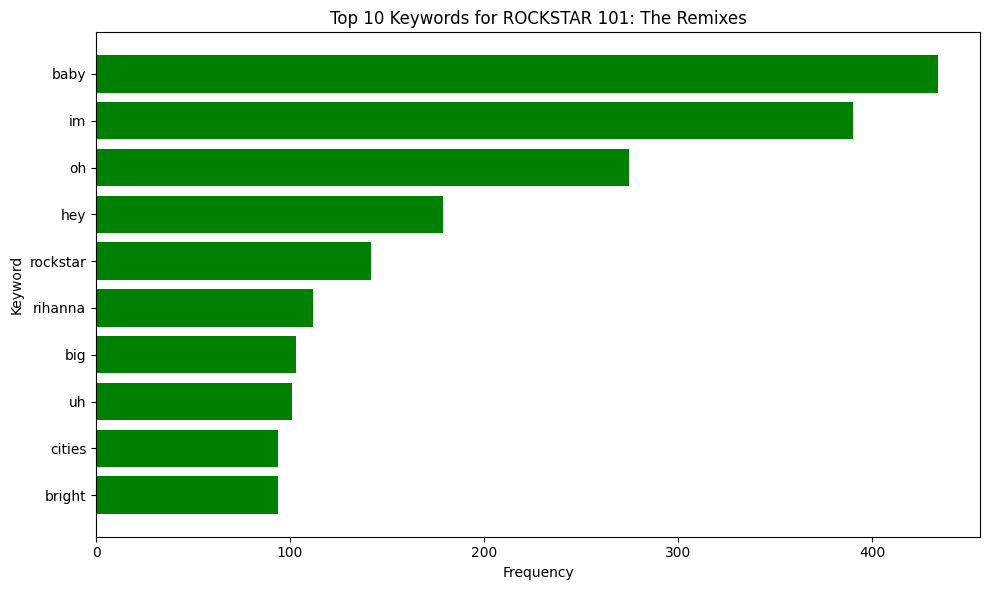

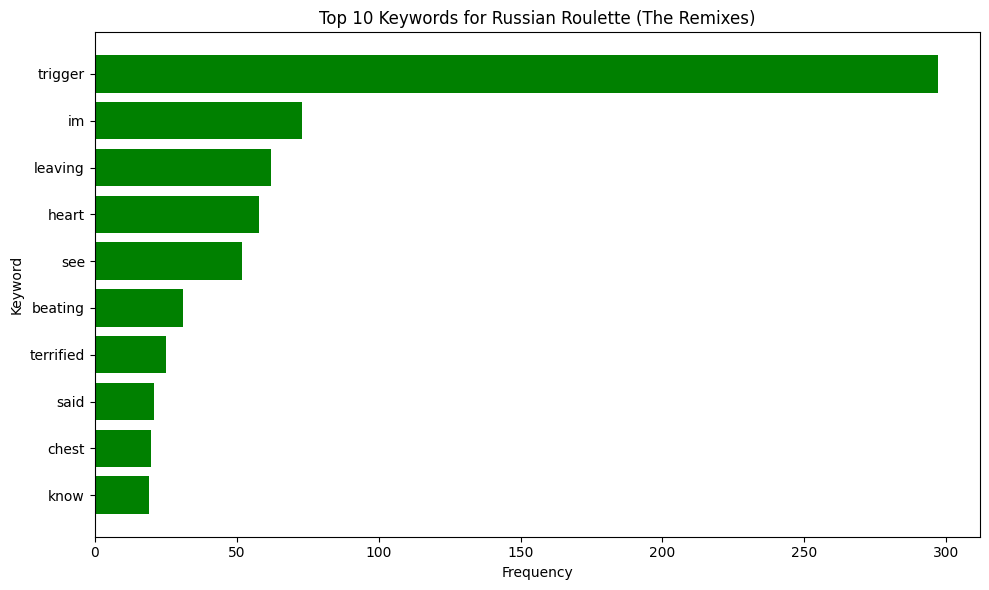

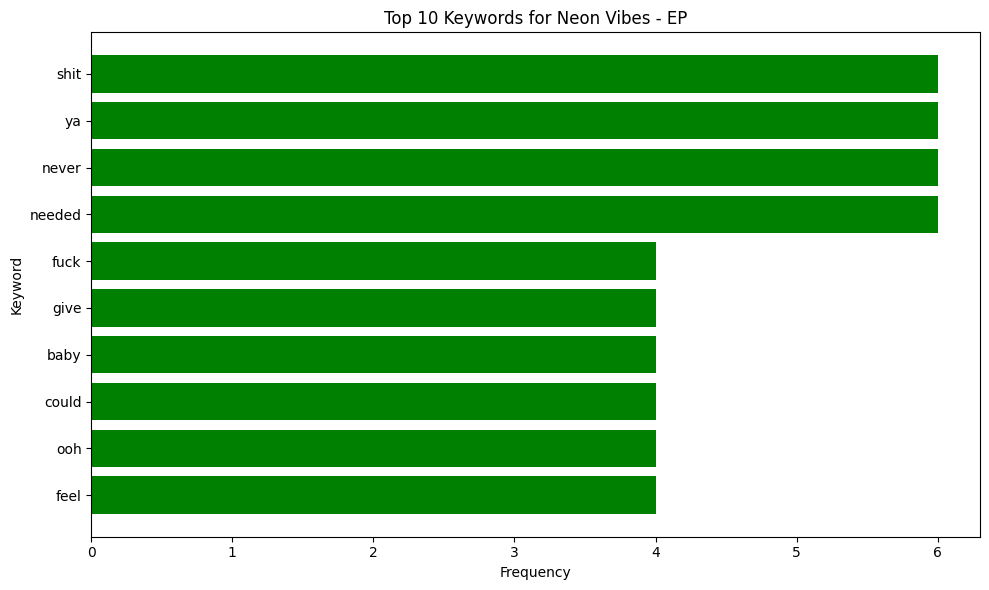

Horizontal bar charts displayed for top 10 keywords of each album.


In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Get a list of unique album names for consistent color mapping if desired, though not strictly needed for individual charts
album_names = list(album_keywords.keys())
num_albums = len(album_names)

# For looop iteratres through album
for album, keywords in album_keywords.items():
    if not keywords:
        print(f"No keywords found for album: {album}")
        continue

    # Separate keywords and their counts
    words = [kw[0] for kw in keywords]
    counts = [kw[1] for kw in keywords]

    # Sort by count for better visualization in bar chart (highest at top)
    words.reverse()
    counts.reverse()

    plt.figure(figsize=(10, 6))
    plt.barh(words, counts, color='green')
    plt.xlabel('Frequency')
    plt.ylabel('Keyword')
    plt.title(f'Top 10 Keywords for {album}')
    plt.tight_layout()
    plt.show()

print("Horizontal bar charts displayed for top 10 keywords of each album.")

## Method 3 Interpretation: Top Keywords

**Recurring Themes:**

1.  **Love and Relationships:** Words like "love," "baby," "boy," "know," and "want" frequently appear across many albums (e.g., *ANTI*, *Unapologetic*, *Good Girl Gone Bad*, *Loud*, *A Girl Like Me*, *Rated R*). This indicates a consistent focus on romantic relationships, their complexities, desires, and emotional impact throughout her career.
2.  **Self-Assertion and Empowerment:** Keywords such as "im," "dont," "get," "like," and "fuck" (especially in albums like *Unapologetic* and *Rated R*) suggest themes of independence, confidence, and not conforming to expectations. There's a strong sense of self-expression and defiance.
3.  **Party Life and Escapism:** Words like "night," "work" (in a party context, as in *Work* from *ANTI*), "jump," and "drink" (from *Higher* on *ANTI*) point to themes of nightlife, partying, and perhaps a desire for escapism or carefree living. This is evident in albums such as *ANTI* and *Unapologetic* with words like "numb" and "runaway."
4.  **Desire and Intimacy:** Terms like "sex" (from *Sex with Me* on *ANTI*) and explicit language (e.g., "fuck" in several contexts) indicate a strong presence of themes related to desire, sensuality, and intimate experiences in her lyrics.

**Significant Shifts and Album-Specific Nuances (as seen in sorted album from most recent to descending first albums):**


*   **Early Career (e.g., *Music of the Sun*, *A Girl Like Me*):** Keywords might lean more towards conventional pop/R&B themes of nascent love and heartbreak, with a slightly less assertive tone.

*   **Evolution to *Good Girl Gone Bad* and *Loud*:** These albums show a clear emergence of the more confident, playful, and assertive Rihanna. Keywords like "dont," "know," "im," "like," "got," and "baby" become prominent, reflecting a blend of romantic narratives with burgeoning independence and pop appeal.

*   **Darker/Edgier Period (*Rated R*):** This album stands out with potentially darker, more introspective, or even defiant keywords, aligning with its overall thematic shift towards raw emotions and vulnerability after personal struggles.

*   ***Unapologetic*:** The title itself suggests themes of unapologetic self-expression. Keywords like "im," "jump," "phresh," "love," "like," "get," "going," and "numb" suggest a mix of defiance, high energy, and possibly emotional detachment or intensity.

*   **Later Career (*ANTI*):** This album is characterized by a more experimental sound and a blend of themes. Keywords like "night," "oh," "work," "yeah," "know," "dont," "like," "love," "get," and "im" show a mature reflection on relationships, pleasure, and individuality, often with a relaxed or contemplative tone. The prevalence of "work" (referring to the song "Work") also highlights its cultural impact.

**Overall Trends:**

*   There's a general trend from more conventional love songs in her earlier works to a more complex, nuanced exploration of relationships, empowerment, and sensuality in her later albums.
*   The use of more assertive and explicit language becomes more frequent as her career progresses, aligning with her evolving public persona as a confident and independent artist.
*   Repetitive phrases or single-word choruses
* Hence, the analysis of top keywords reveals a consistent focus on love, self-expression, and lifestyle throughout Rihanna's career, but with shifts in emphasis and specific lyrical choices that give each album its distinct flavor and highlight her evolution as an artist. The presence of certain words can also be attributed to the nature of pop music, which often uses repetition.